In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

epsilon

fix fact bank fraction = 0.5

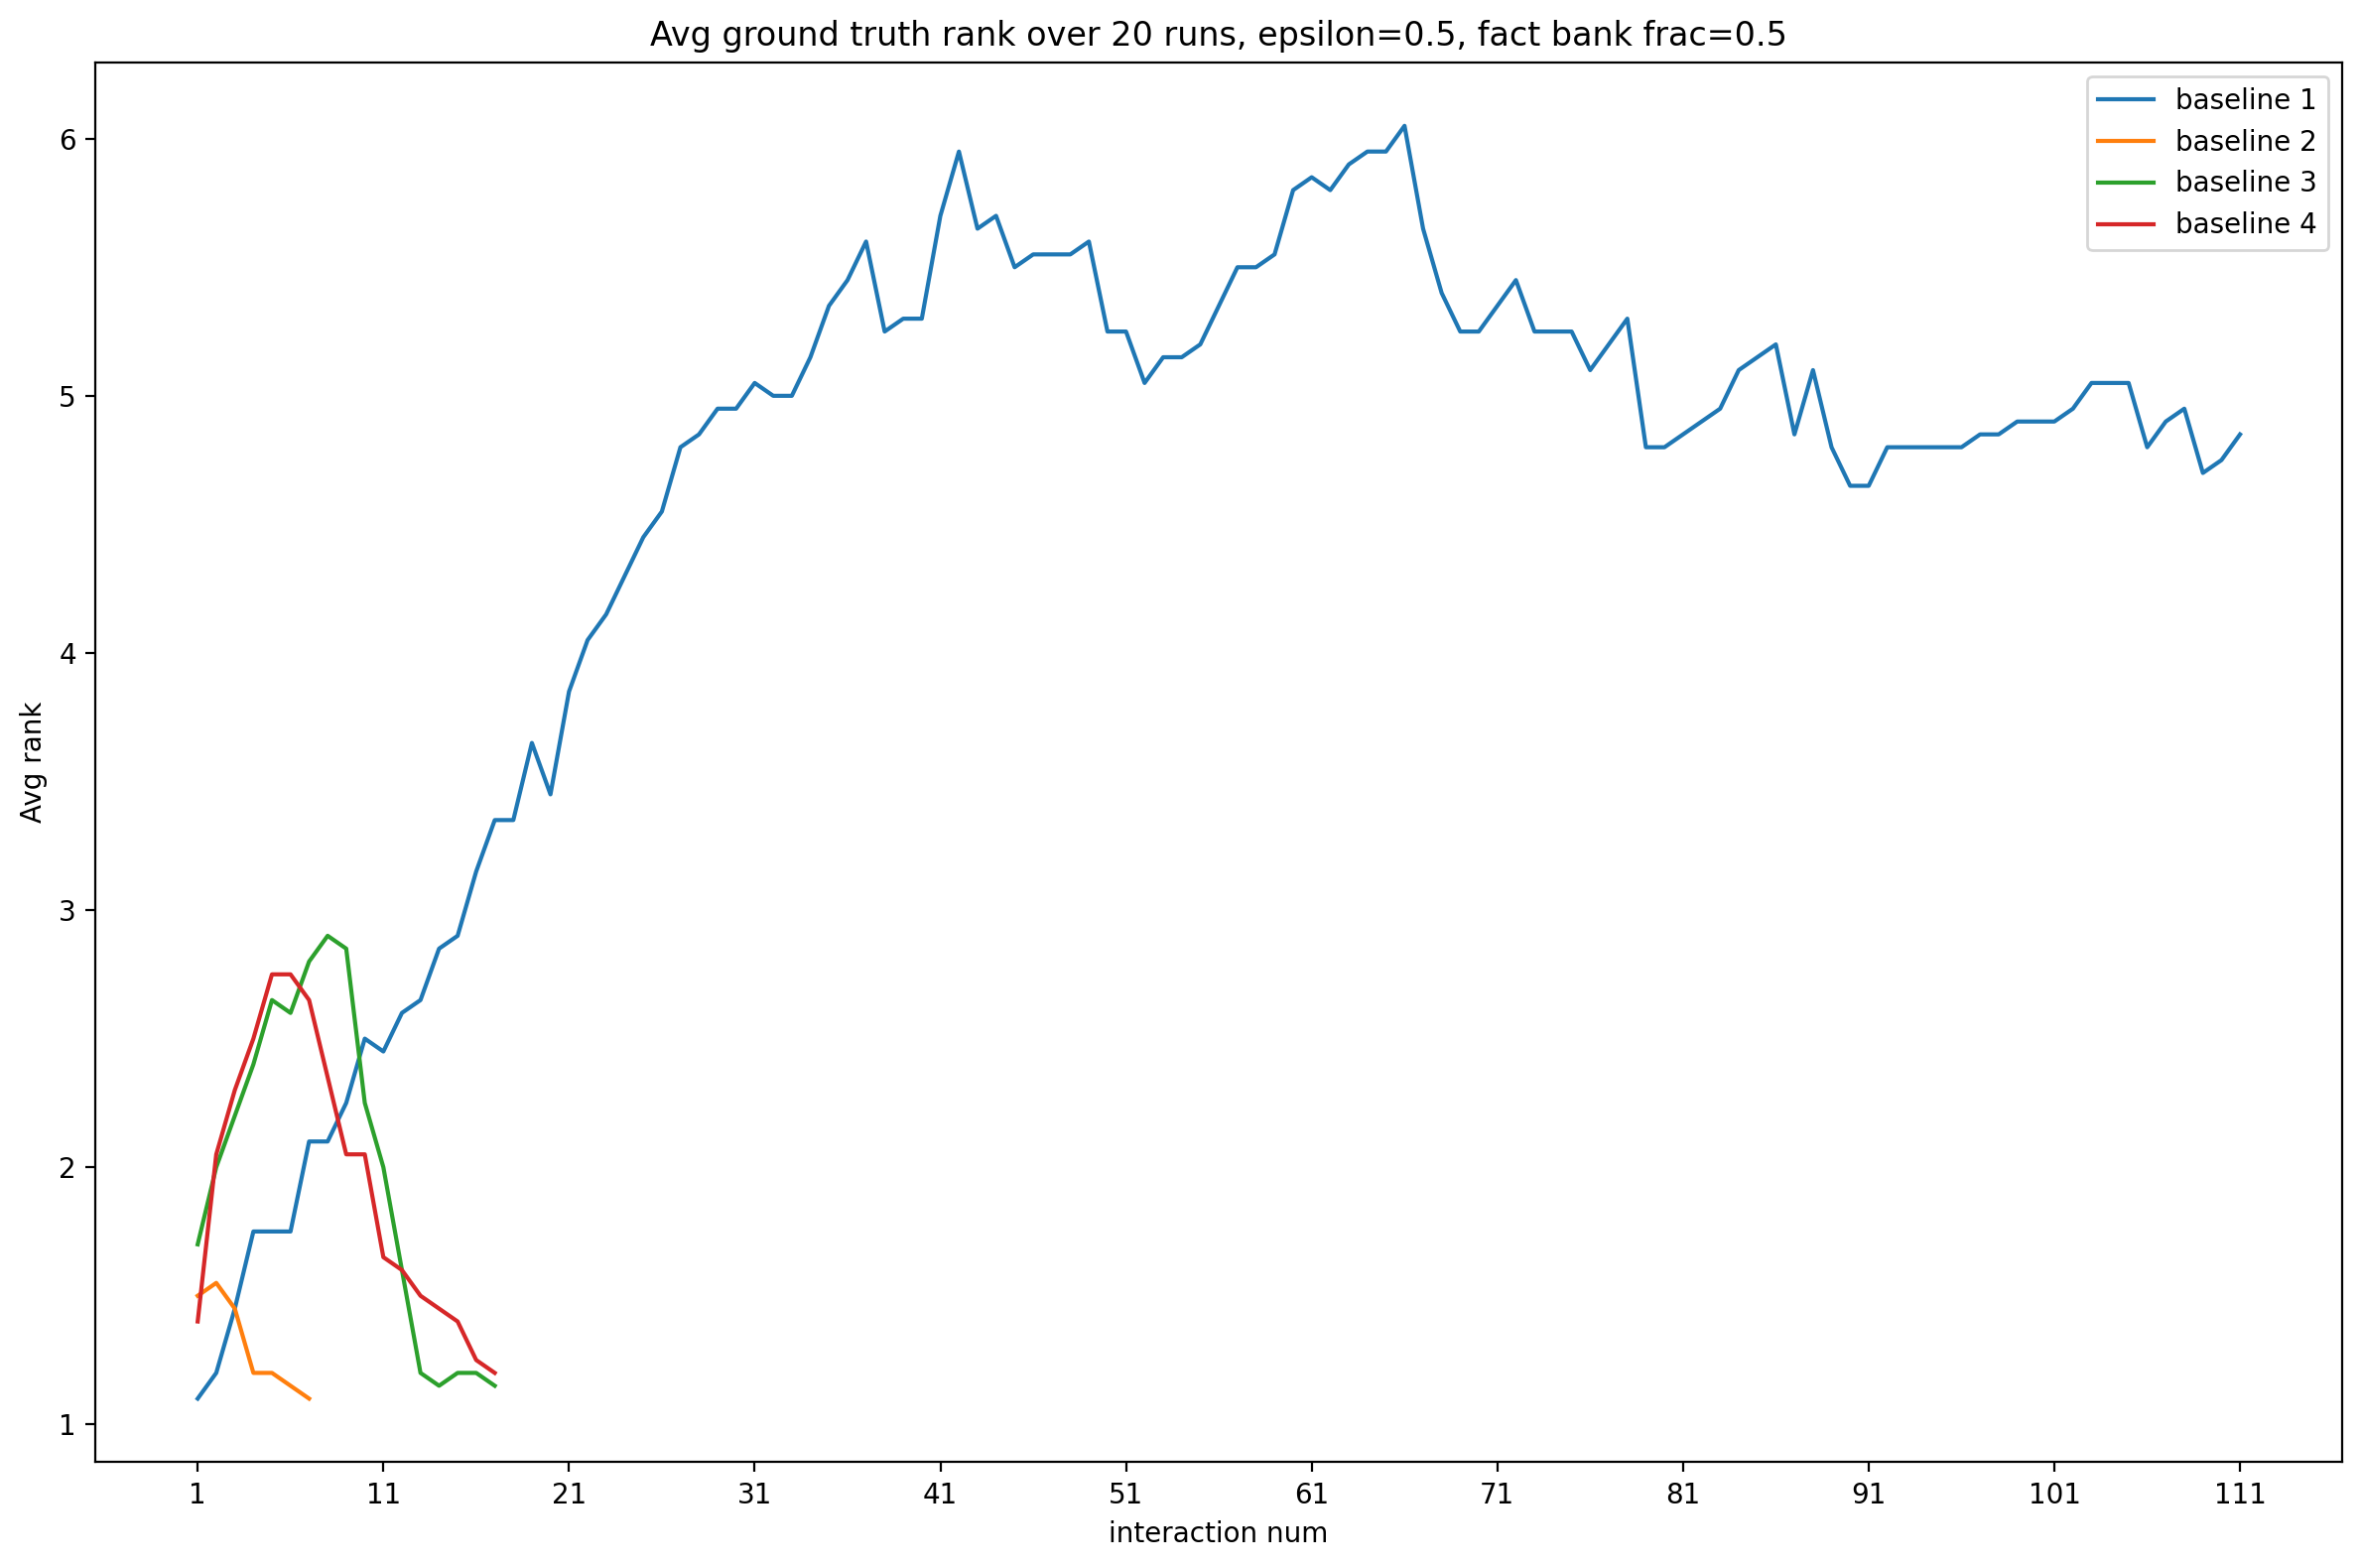

+----------------------+-------------------+---------------------+--------------------+--------------------+
|                      |    baseline 1     |     baseline 2      |     baseline 3     |     baseline 4     |
+----------------------+-------------------+---------------------+--------------------+--------------------+
|      num views       |        105        |          5          |         13         |         13         |
|      4c time(s)      | 94.74149012565613 | 0.40916919708251953 | 0.6863789558410645 | 0.7089169025421143 |
| presentation time(s) | 9.607042670249939 | 0.5142347812652588  | 0.9510329723358154 | 0.9153167963027954 |
+----------------------+-------------------+---------------------+--------------------+--------------------+


In [35]:
labels = ["baseline 1", "baseline 2", "baseline 3", "baseline 4"]

avg_ground_truth_rank_by_baseline = []
avg_time_by_baseline = ["presentation time(s)"]

max_num_interactions = -1
num_runs = 0

epsilon = 0.5

for i in range(len(labels)):
    dir_path = "./presentation_plots/result" + str(i + 1) + "/"
    result_by_epsilon = np.load(dir_path + "result_by_epsilon.npy")
    time_by_epsilon = np.load(dir_path + "time_by_epsilon.npy")

    epsilon_index = int(epsilon * 10 - 1)
    ground_truth_rank_epsilon = result_by_epsilon[epsilon_index]
    avg_ground_truth_rank = np.mean(ground_truth_rank_epsilon, axis=0)
    avg_ground_truth_rank_by_baseline.append(avg_ground_truth_rank)

    time_epsilon = time_by_epsilon[epsilon_index]
    avg_time = np.mean(time_epsilon, axis=0)
    avg_time_by_baseline.append(avg_time)

    if avg_ground_truth_rank.size > max_num_interactions:
        max_num_interactions = avg_ground_truth_rank.size

    num_runs = ground_truth_rank_epsilon.shape[0]

x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_baseline[i]
    if y.size < max_num_interactions:
        y = np.concatenate((y, np.full(max_num_interactions - y.size, np.nan)))
    ax.plot(x_axis, y, label=labels[i])
ax.legend()
ax.set_title("Avg ground truth rank over " + str(num_runs) + " runs, epsilon=" + str(epsilon) + ", fact bank frac=0.5")
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./presentation_plots/avg_rank_epsilon")
plt.close(fig)

# 4C --- 94.74149012565613 seconds ---
# 4C --- 0.40916919708251953 seconds ---
# 4C --- 0.6863789558410645 seconds ---
# 4C --- 0.7089169025421143 seconds ---
from tabulate import tabulate

time_4c = ["4c time(s)", 94.74149012565613, 0.40916919708251953, 0.6863789558410645, 0.7089169025421143]
size = ["num views", 105, 5, 13, 13]
table = [size, time_4c, avg_time_by_baseline]
print(tabulate(table, [""] + labels, tablefmt="pretty"))

# print("4C time: ", time_4c)
# print("avg run rime: ", avg_time_by_baseline)


fact_bank_frac

fix epsilon = 0.5

fact bank = random sample of ground truth view

use the same fact bank for all 20 runs (but each run the sample generated are different)

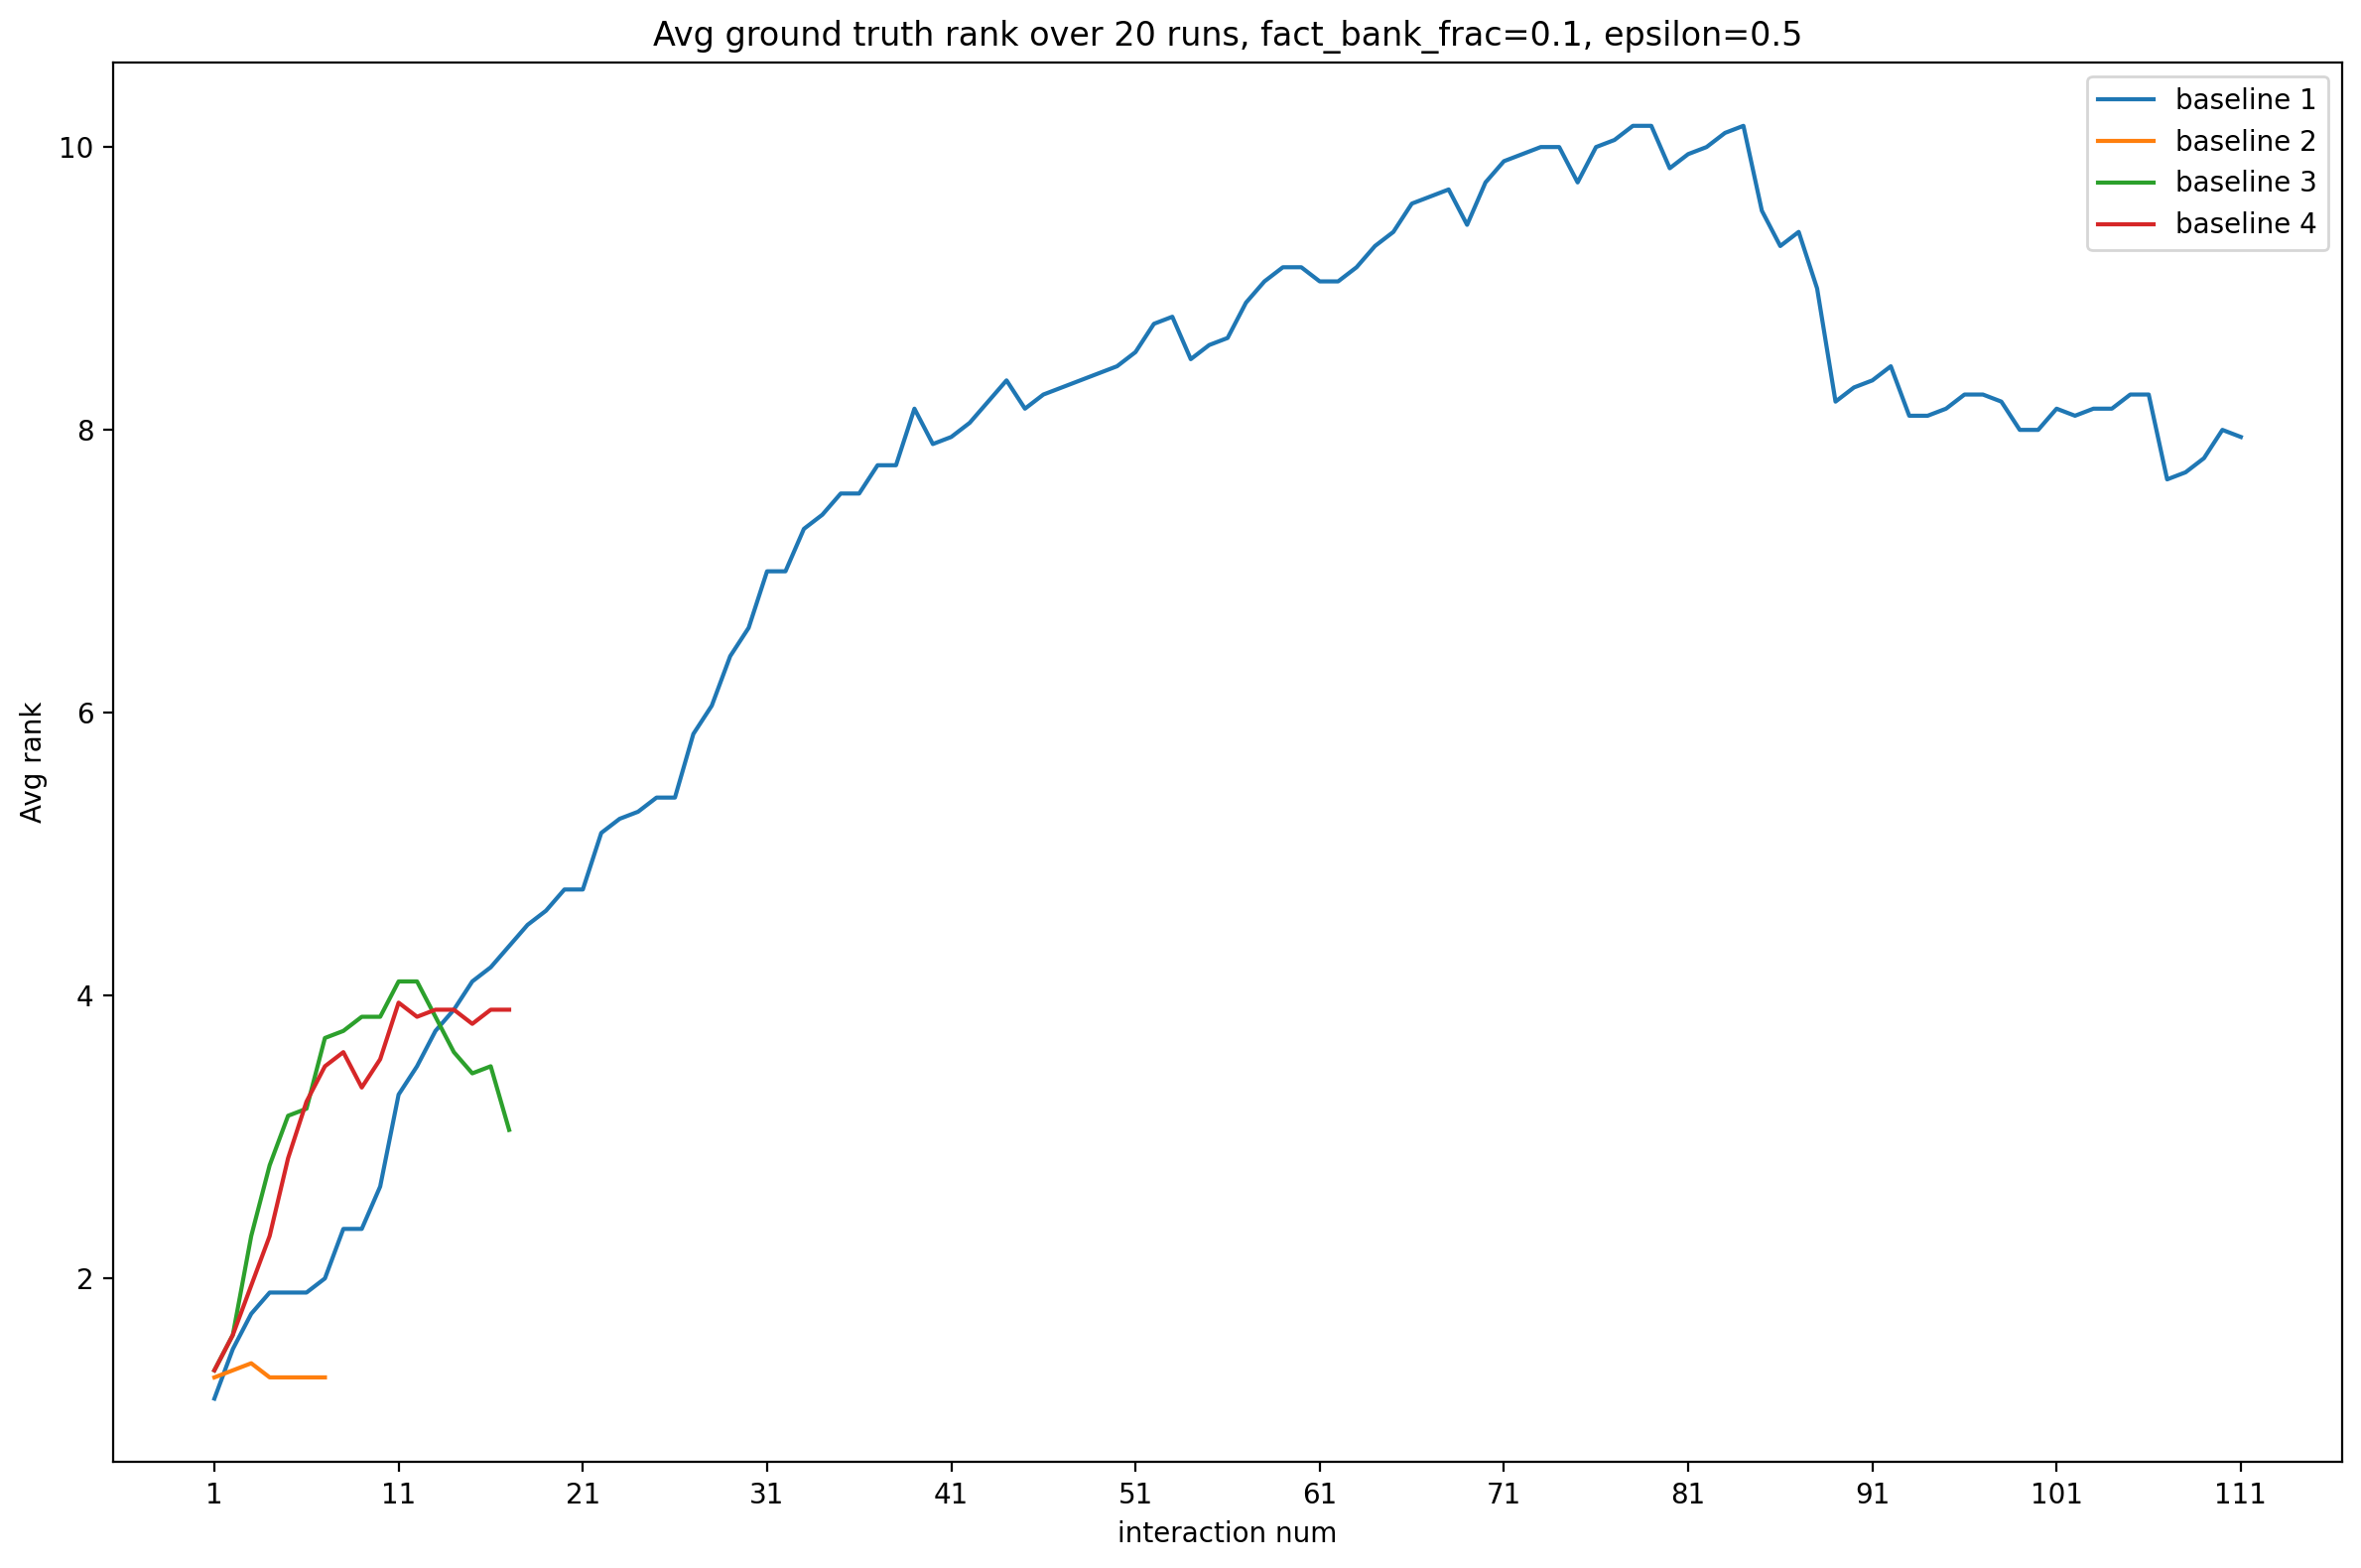

+----------------------+-------------------+--------------------+--------------------+--------------------+
|                      |    baseline 1     |     baseline 2     |     baseline 3     |     baseline 4     |
+----------------------+-------------------+--------------------+--------------------+--------------------+
|      num views       |        105        |         5          |         13         |         13         |
|      4c time(s)      | 96.19283890724182 | 0.4051980972290039 | 0.6976451873779297 | 0.6663432121276855 |
| presentation time(s) | 9.856335031986237 | 0.5457875013351441 | 0.8855685710906982 | 0.9595194697380066 |
+----------------------+-------------------+--------------------+--------------------+--------------------+


In [11]:
labels = ["baseline 1", "baseline 2", "baseline 3", "baseline 4"]

avg_ground_truth_rank_by_baseline = []
avg_time_by_baseline = ["presentation time(s)"]

max_num_interactions = -1
num_runs = 0

fact_bank_frac = 0.1

for i in range(len(labels)):
    dir_path = "./presentation_plots/result" + str(i + 1) + "/"
    result_by_fact_bank_frac = np.load(dir_path + "result_by_fact_bank_frac.npy")
    time_by_fact_bank_frac = np.load(dir_path + "time_by_fact_bank_frac.npy")

    fact_bank_frac_index = int(fact_bank_frac * 10 - 1)
    ground_truth_rank_fact_bank_frac = result_by_fact_bank_frac[fact_bank_frac_index]
    avg_ground_truth_rank = np.mean(ground_truth_rank_fact_bank_frac, axis=0)
    avg_ground_truth_rank_by_baseline.append(avg_ground_truth_rank)

    time_fact_bank_frac = time_by_fact_bank_frac[fact_bank_frac_index]
    avg_time = np.mean(time_fact_bank_frac, axis=0)
    avg_time_by_baseline.append(avg_time)

    if avg_ground_truth_rank.size > max_num_interactions:
        max_num_interactions = avg_ground_truth_rank.size

    num_runs = ground_truth_rank_fact_bank_frac.shape[0]

x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_baseline[i]
    if y.size < max_num_interactions:
        y = np.concatenate((y, np.full(max_num_interactions - y.size, np.nan)))
    ax.plot(x_axis, y, label=labels[i])
ax.legend()
ax.set_title(
    "Avg ground truth rank over " + str(num_runs) + " runs, fact_bank_frac=" + str(fact_bank_frac) + ", epsilon=0.5")
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./presentation_plots/avg_rank_fact_bank_frac")
plt.close(fig)

# 4C --- 96.19283890724182 seconds ---
# 4C --- 0.4051980972290039 seconds ---
# 4C --- 0.6976451873779297 seconds ---
# 4C --- 0.6663432121276855 seconds ---
from tabulate import tabulate

time_4c = ["4c time(s)", 96.19283890724182, 0.4051980972290039, 0.6976451873779297, 0.6663432121276855]
size = ["num views", 105, 5, 13, 13]
table = [size, time_4c, avg_time_by_baseline]
print(tabulate(table, [""] + labels, tablefmt="pretty"))

Uncertainty framework

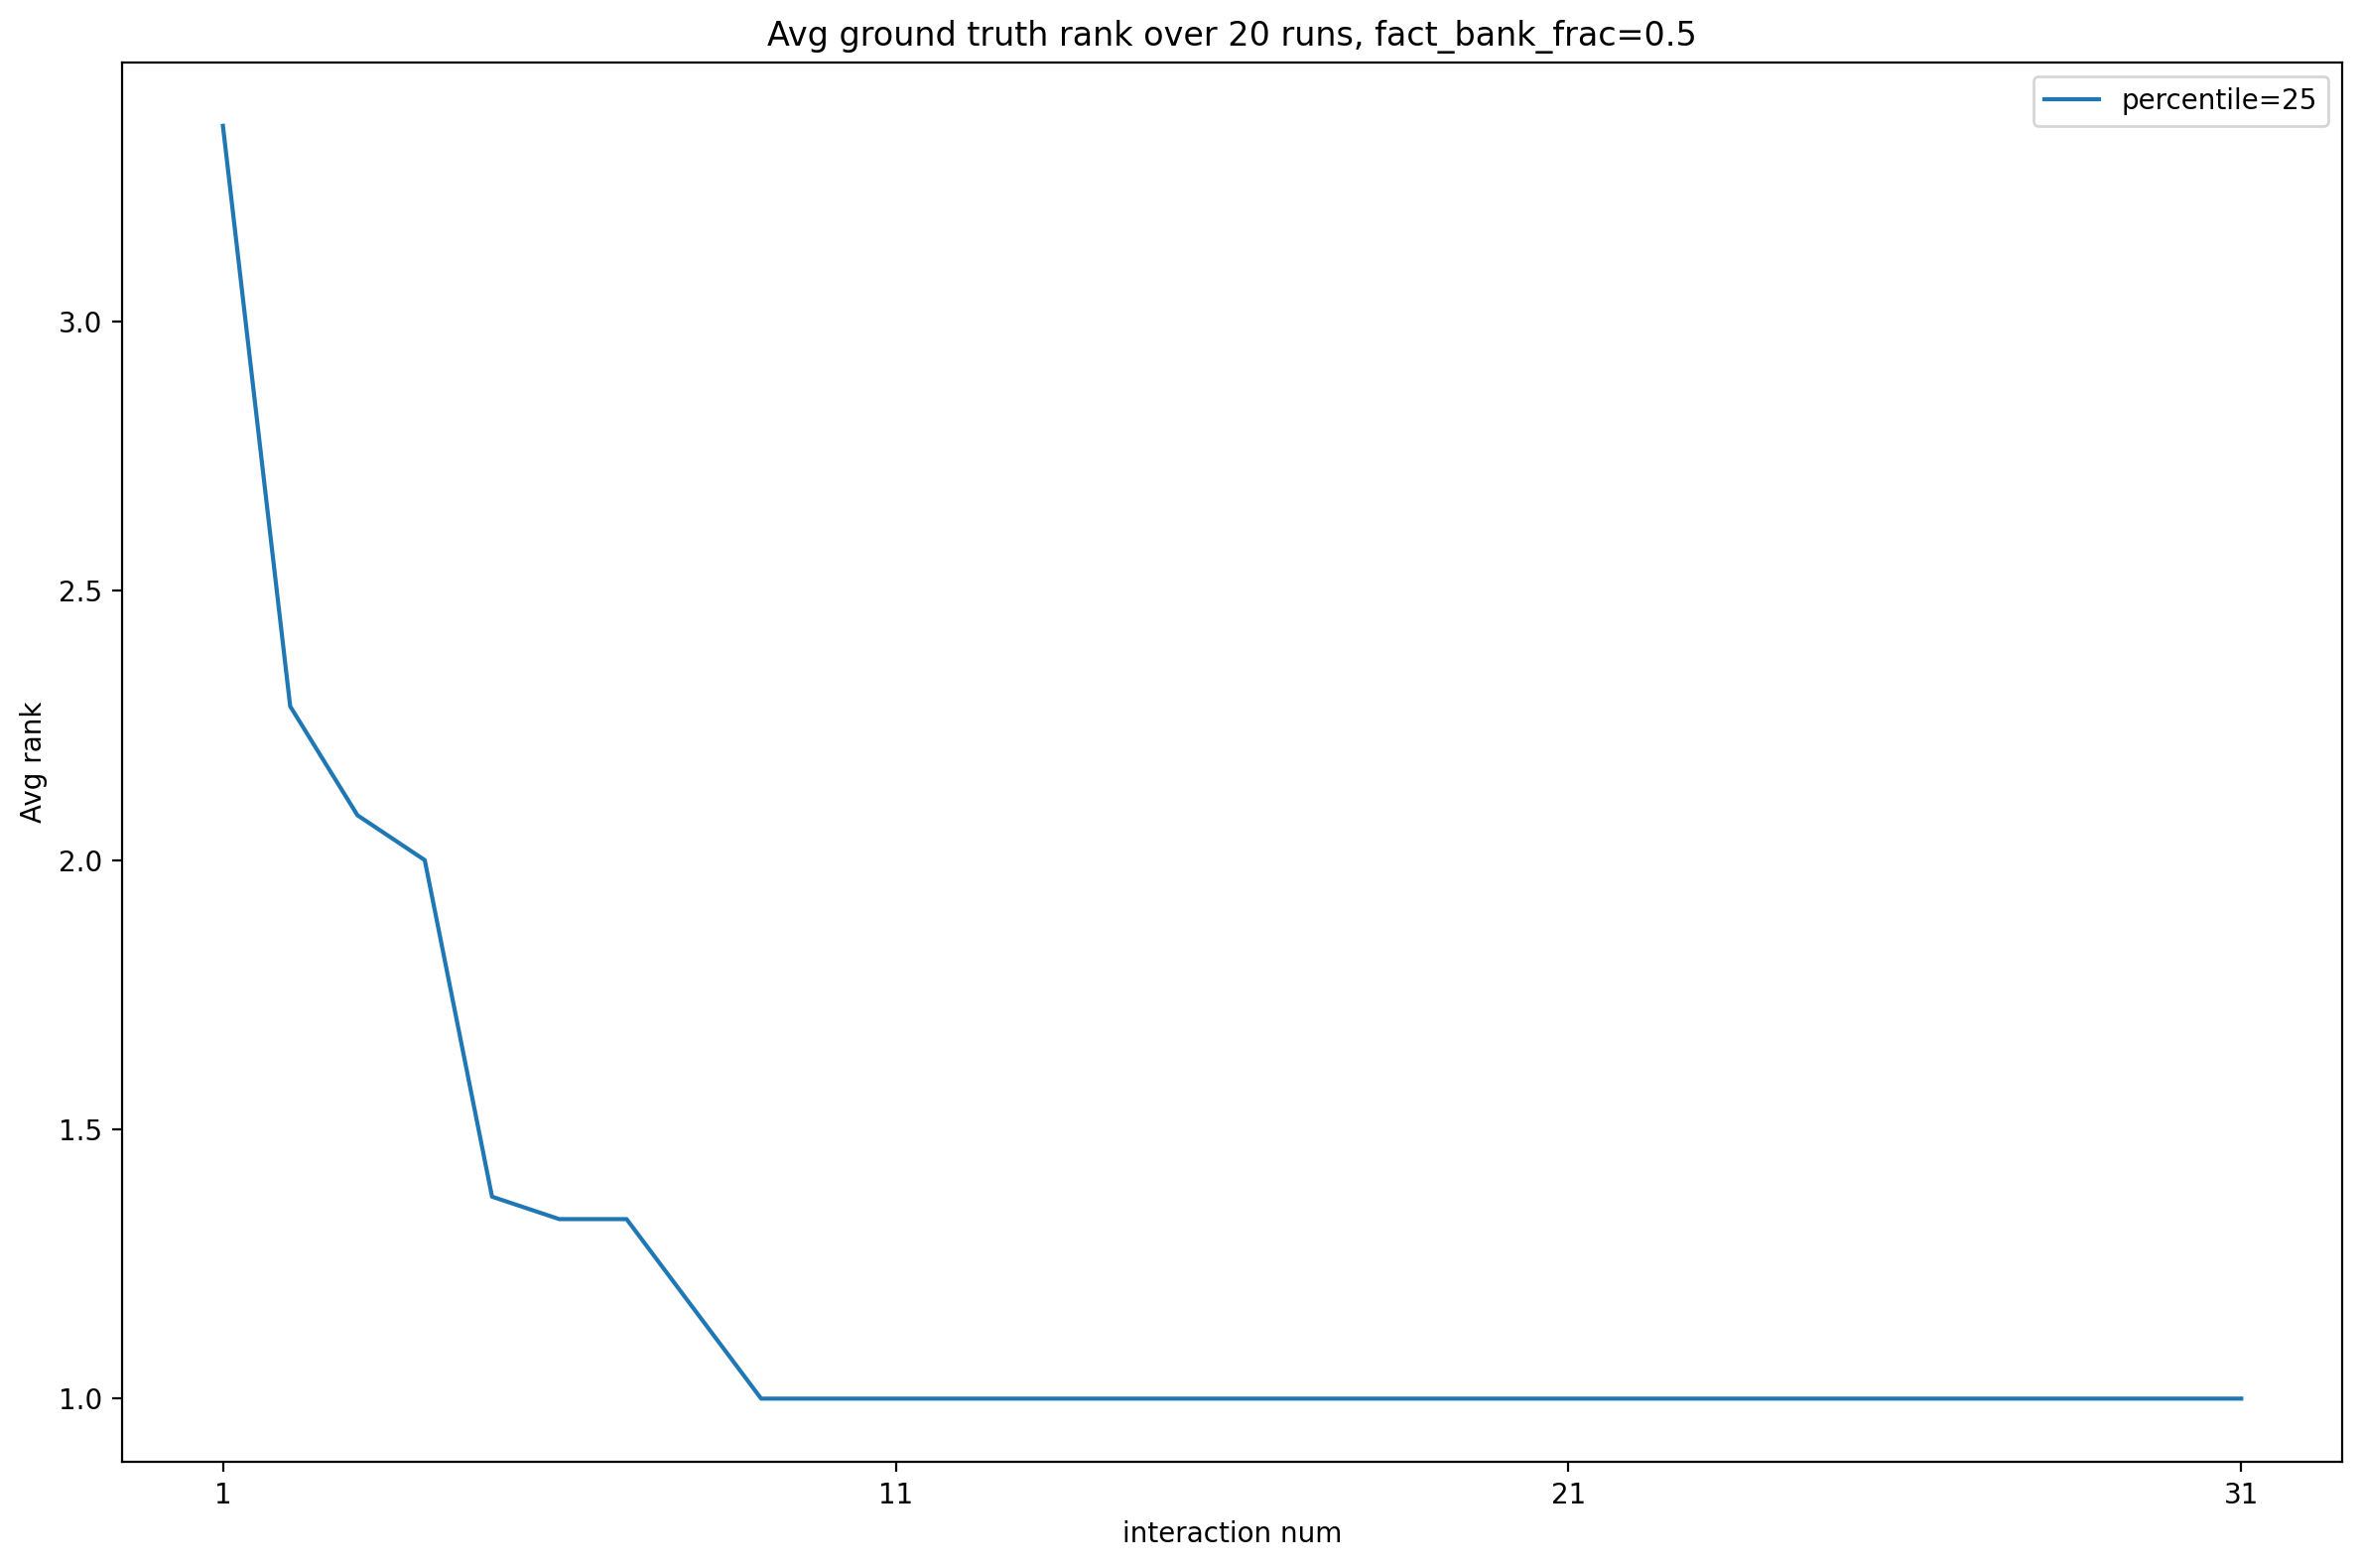

In [23]:
# labels = ["percentile=0", "percentile=25", "percentile=50", "percentile=75", "percentile=100"]
labels = ["percentile=25"]

fact_bank_frac = 0.5
result_by_top_percentile = np.load("./result_uncertainty/result_by_top_percentile.npy")
# print(result_by_top_percentile)
avg_ground_truth_rank_by_percentile = []
num_runs = 0

import warnings

warnings.filterwarnings(action='ignore', message='Mean of empty slice')

for i in range(len(labels)):
    ground_truth_rank = result_by_top_percentile[i]
    # print(ground_truth_rank)
    # print("-----------------------------------------")
    avg_ground_truth_rank = np.nanmean(ground_truth_rank, axis=0)
    avg_ground_truth_rank_by_percentile.append(avg_ground_truth_rank)
    # print(avg_ground_truth_rank)
    # print("-----------------------------------------")

    num_runs = ground_truth_rank.shape[0]

max_num_interactions = avg_ground_truth_rank_by_percentile[0].size
x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_percentile[i]
    if labels[i] == "percentile=100":
        ax.plot(x_axis, y, '-o', label=labels[i])
    else:
        ax.plot(x_axis, y, label=labels[i])

ax.legend()
ax.set_title("Avg ground truth rank over " + str(num_runs) + " runs, fact_bank_frac=" + str(fact_bank_frac))
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./result_uncertainty/avg_rank2")
plt.close(fig)

chembl/wdc experiment

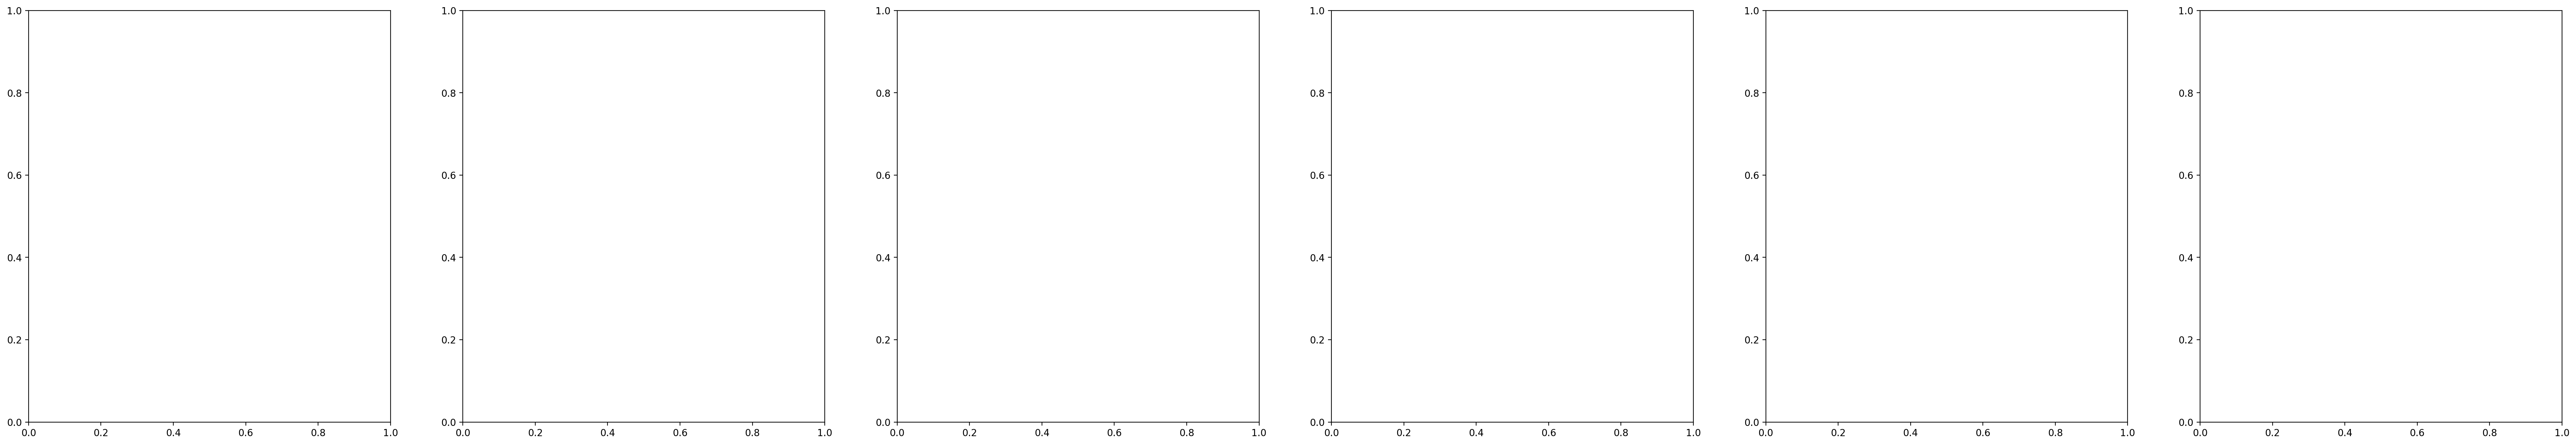

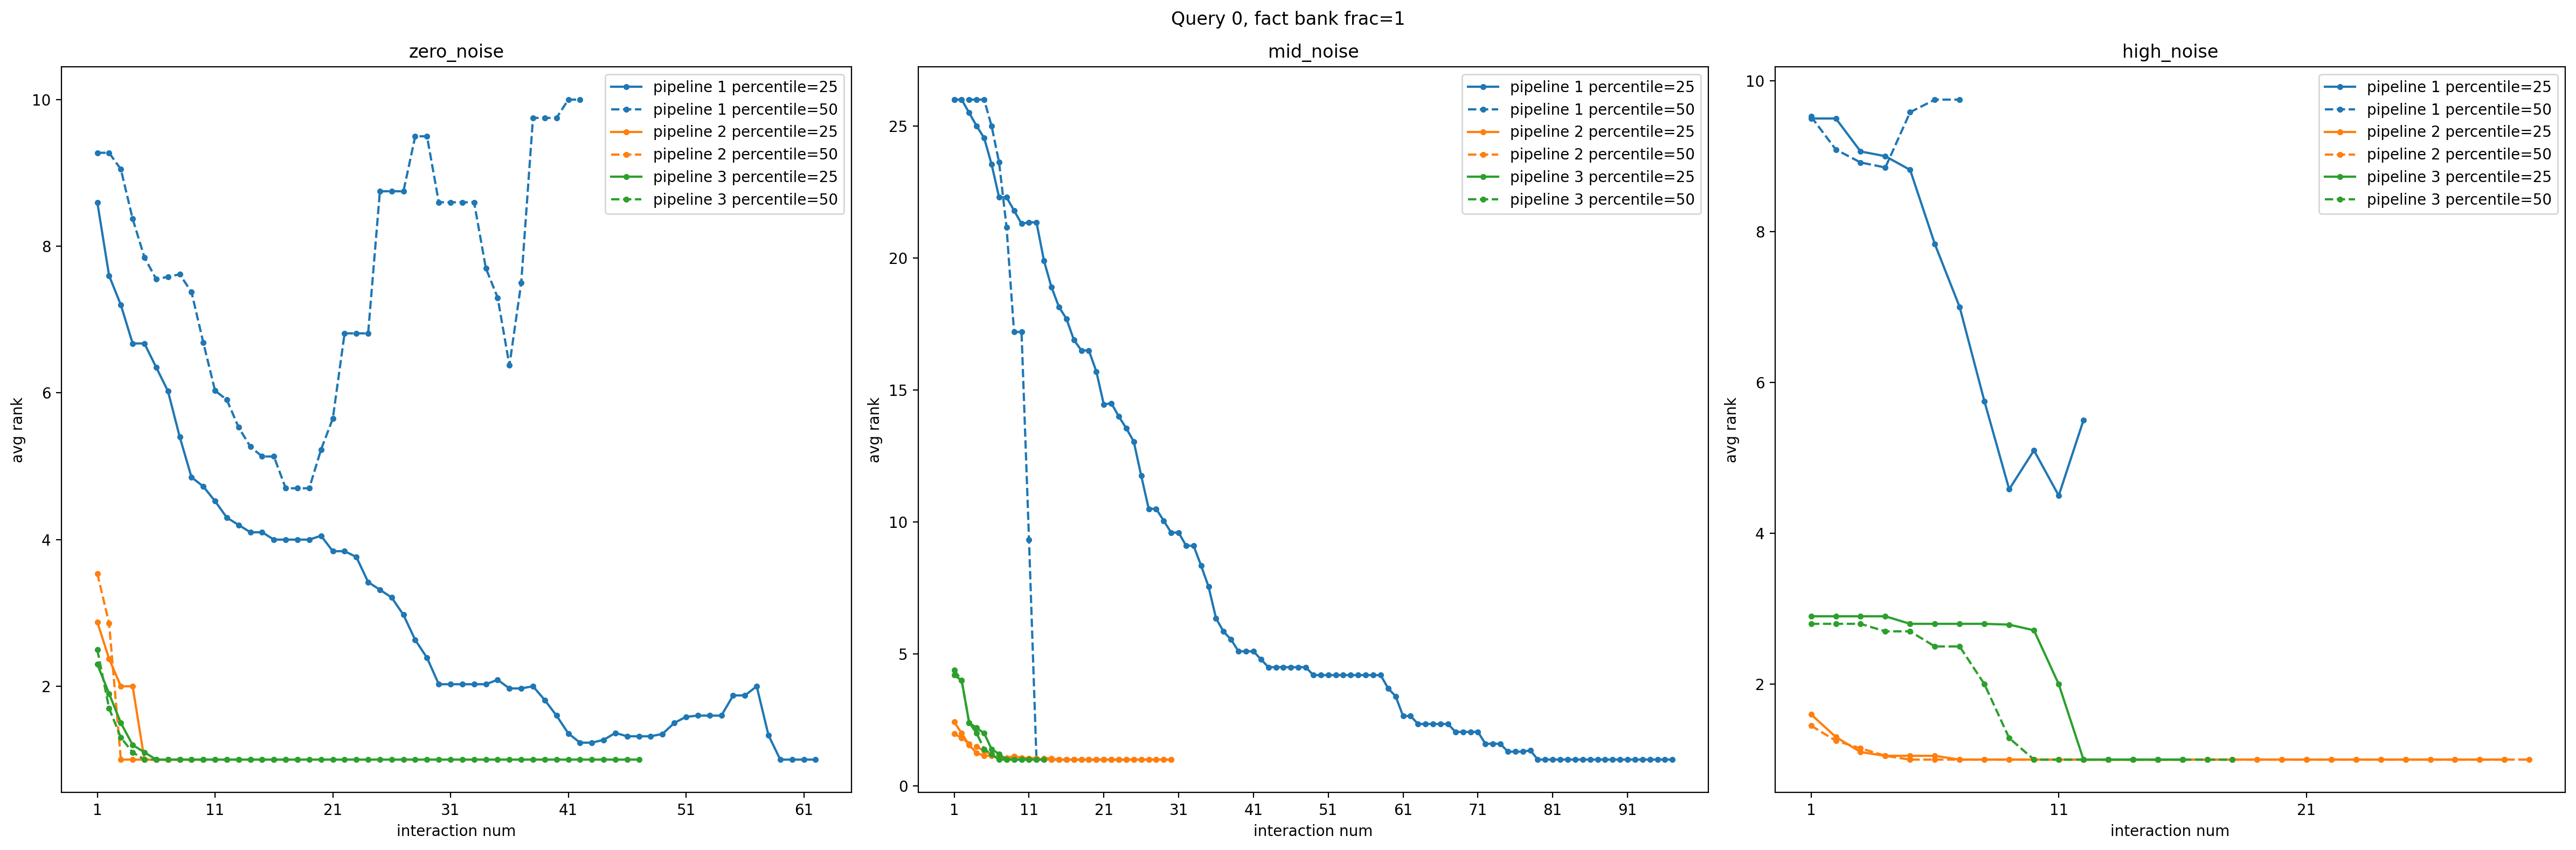

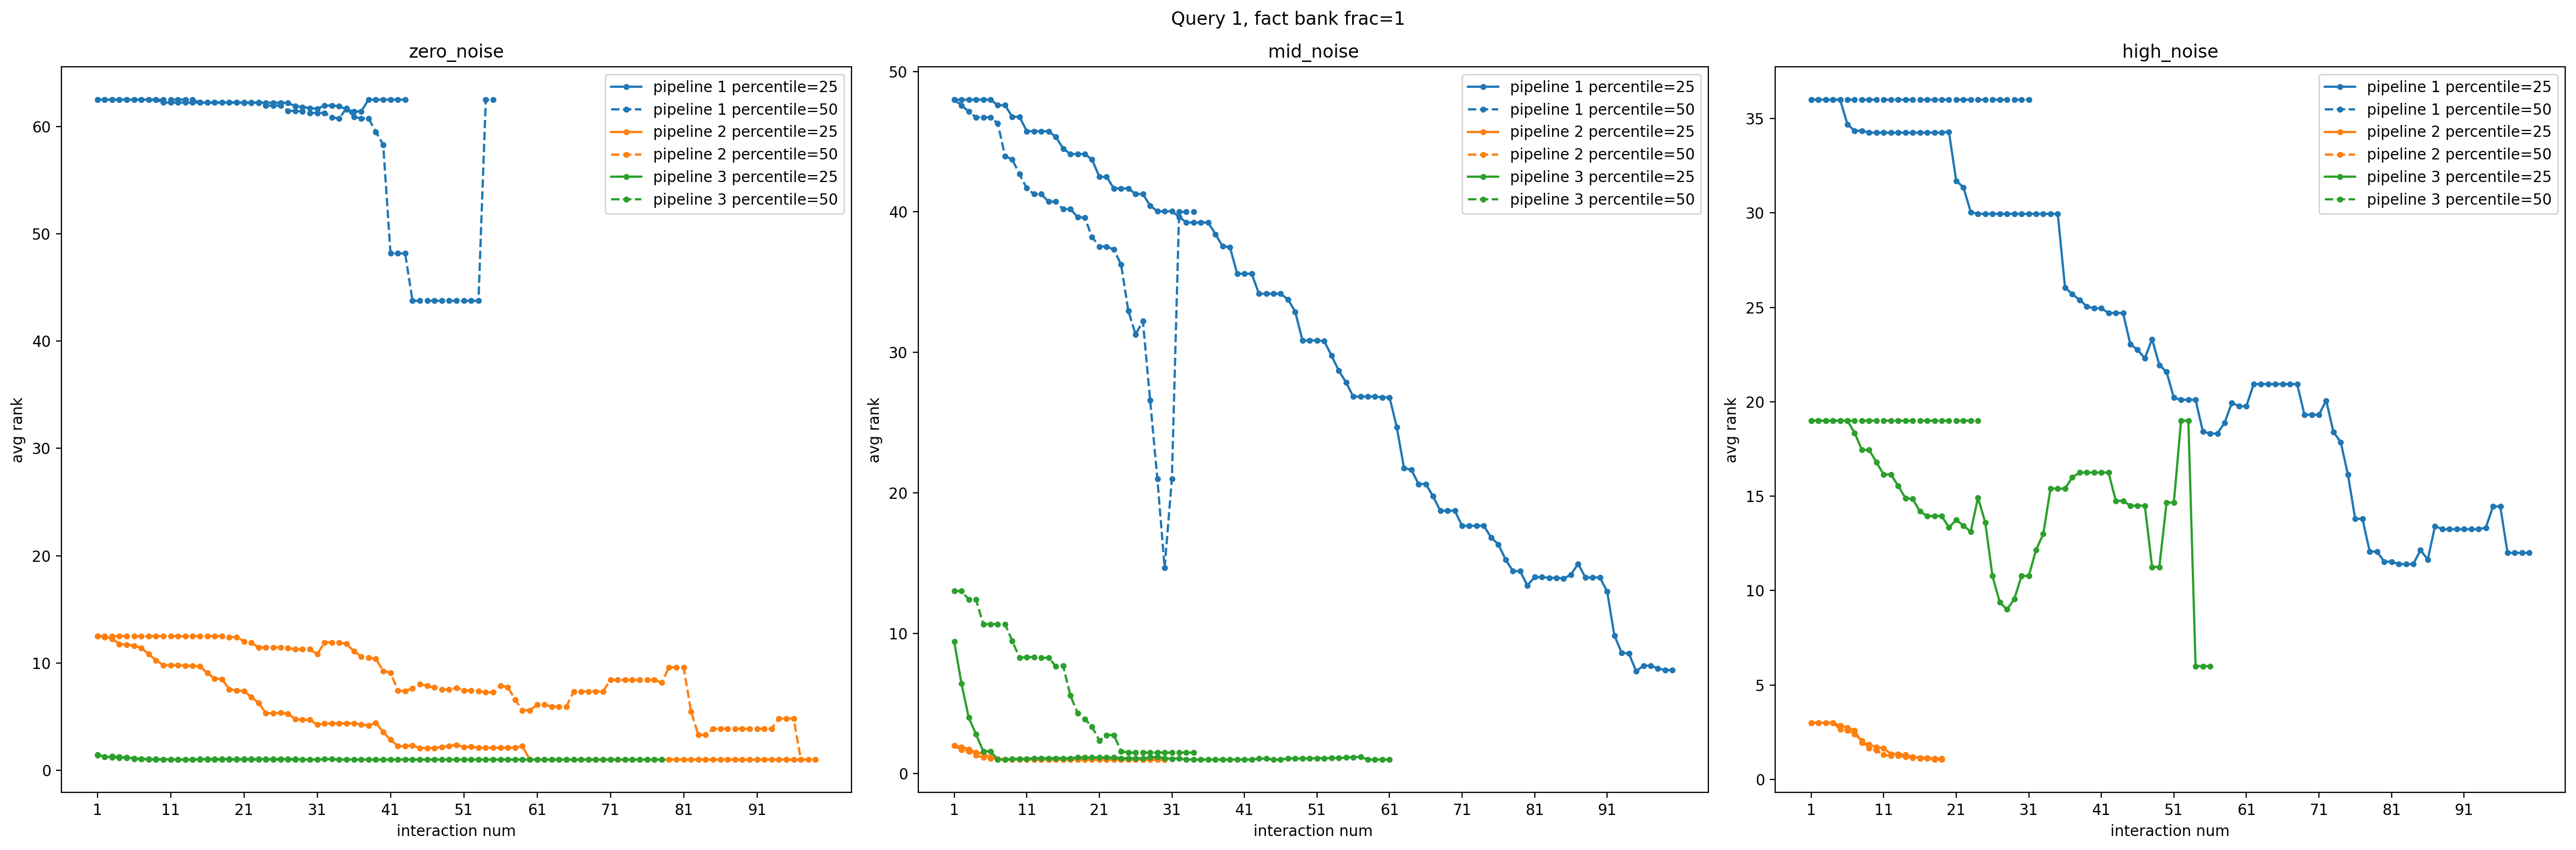

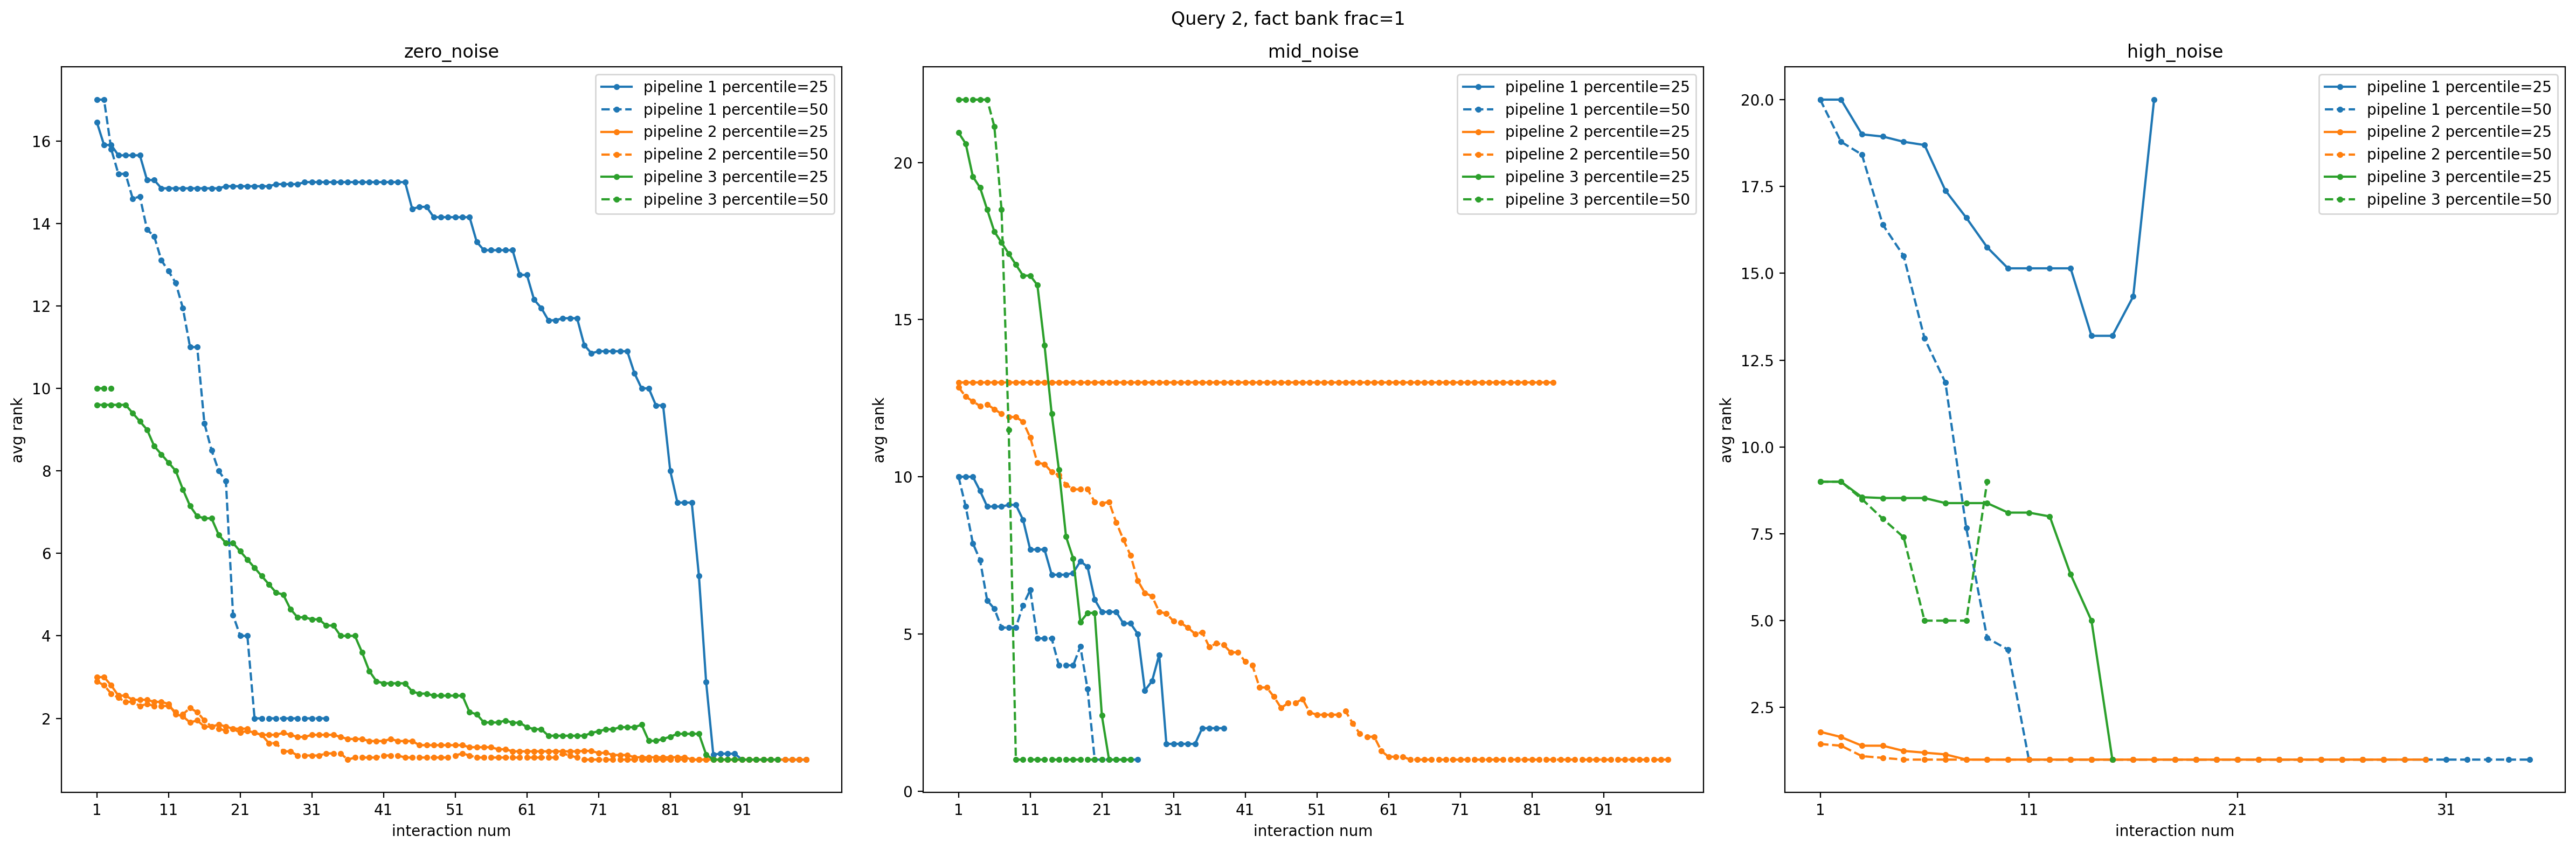

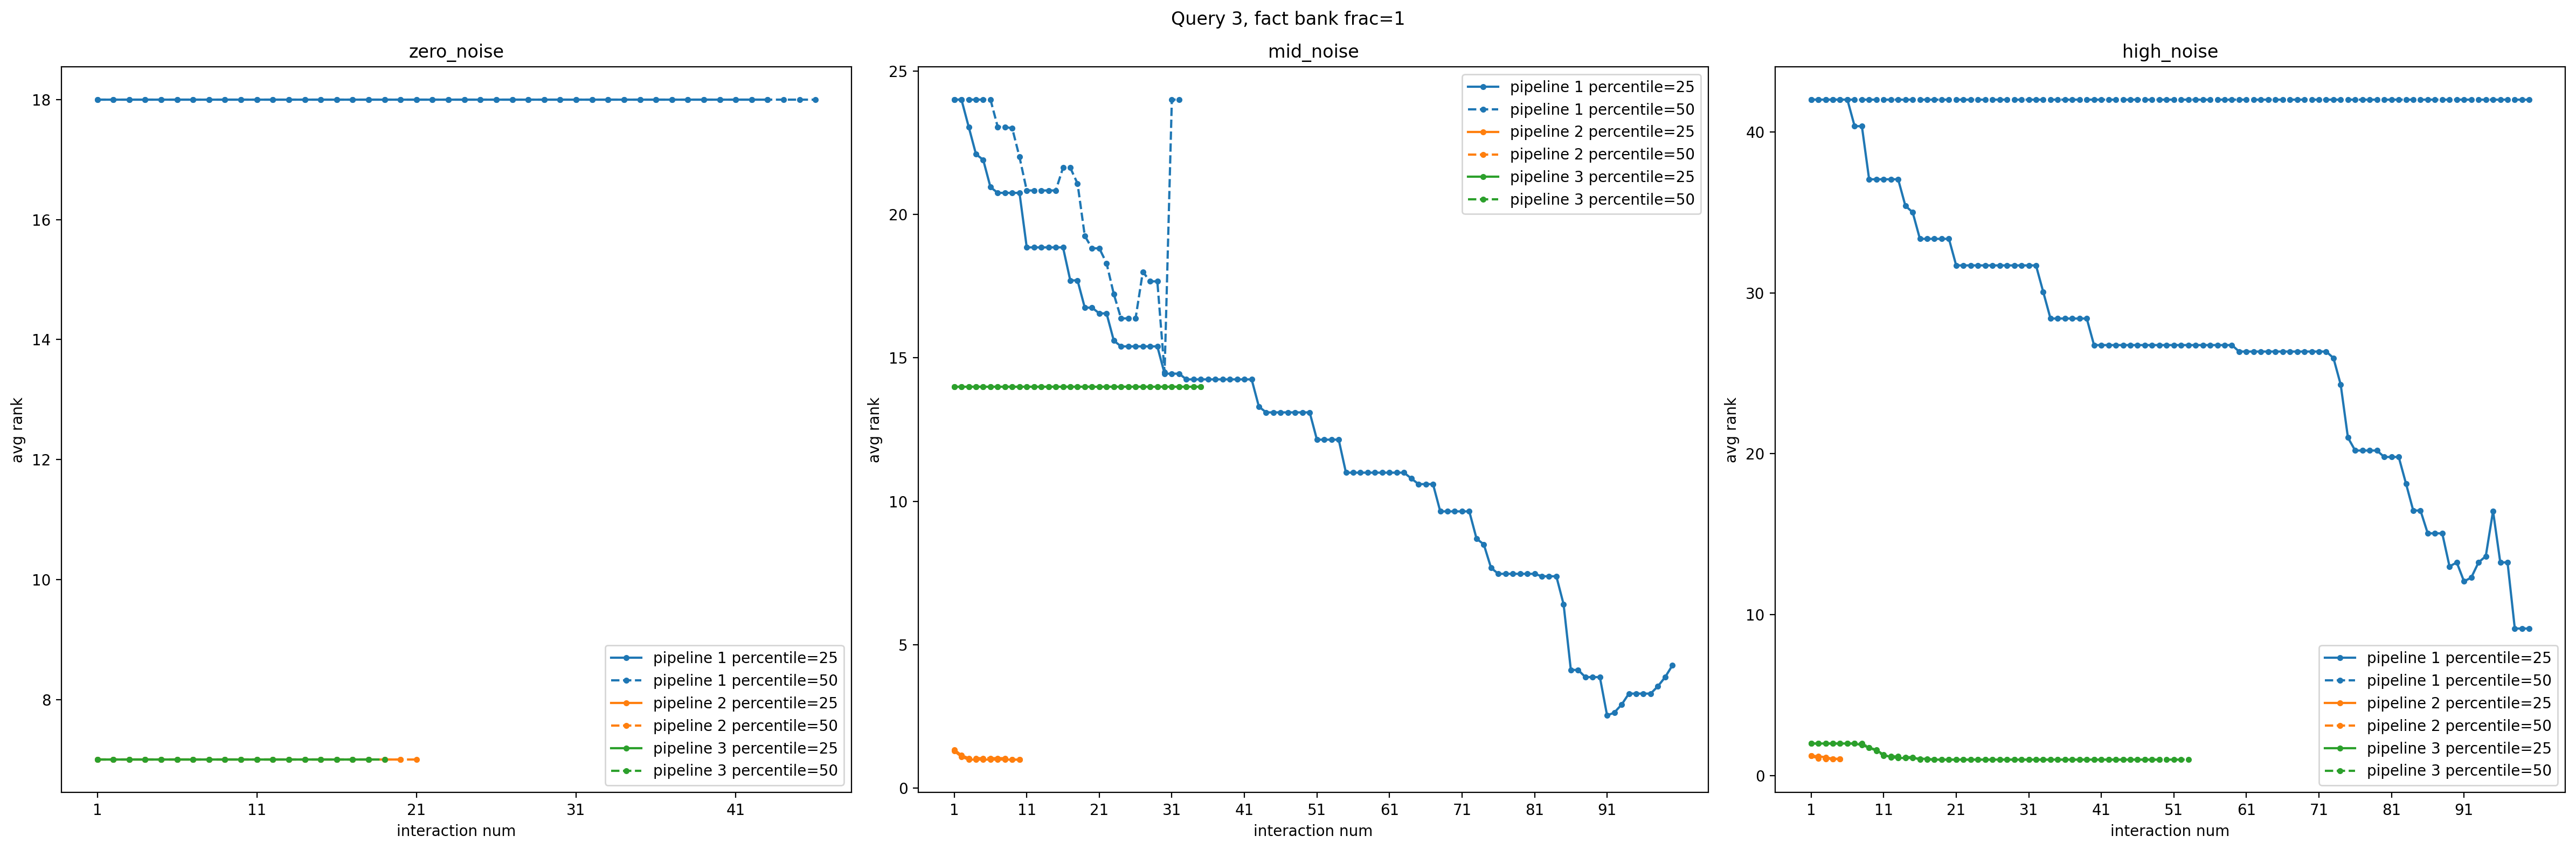

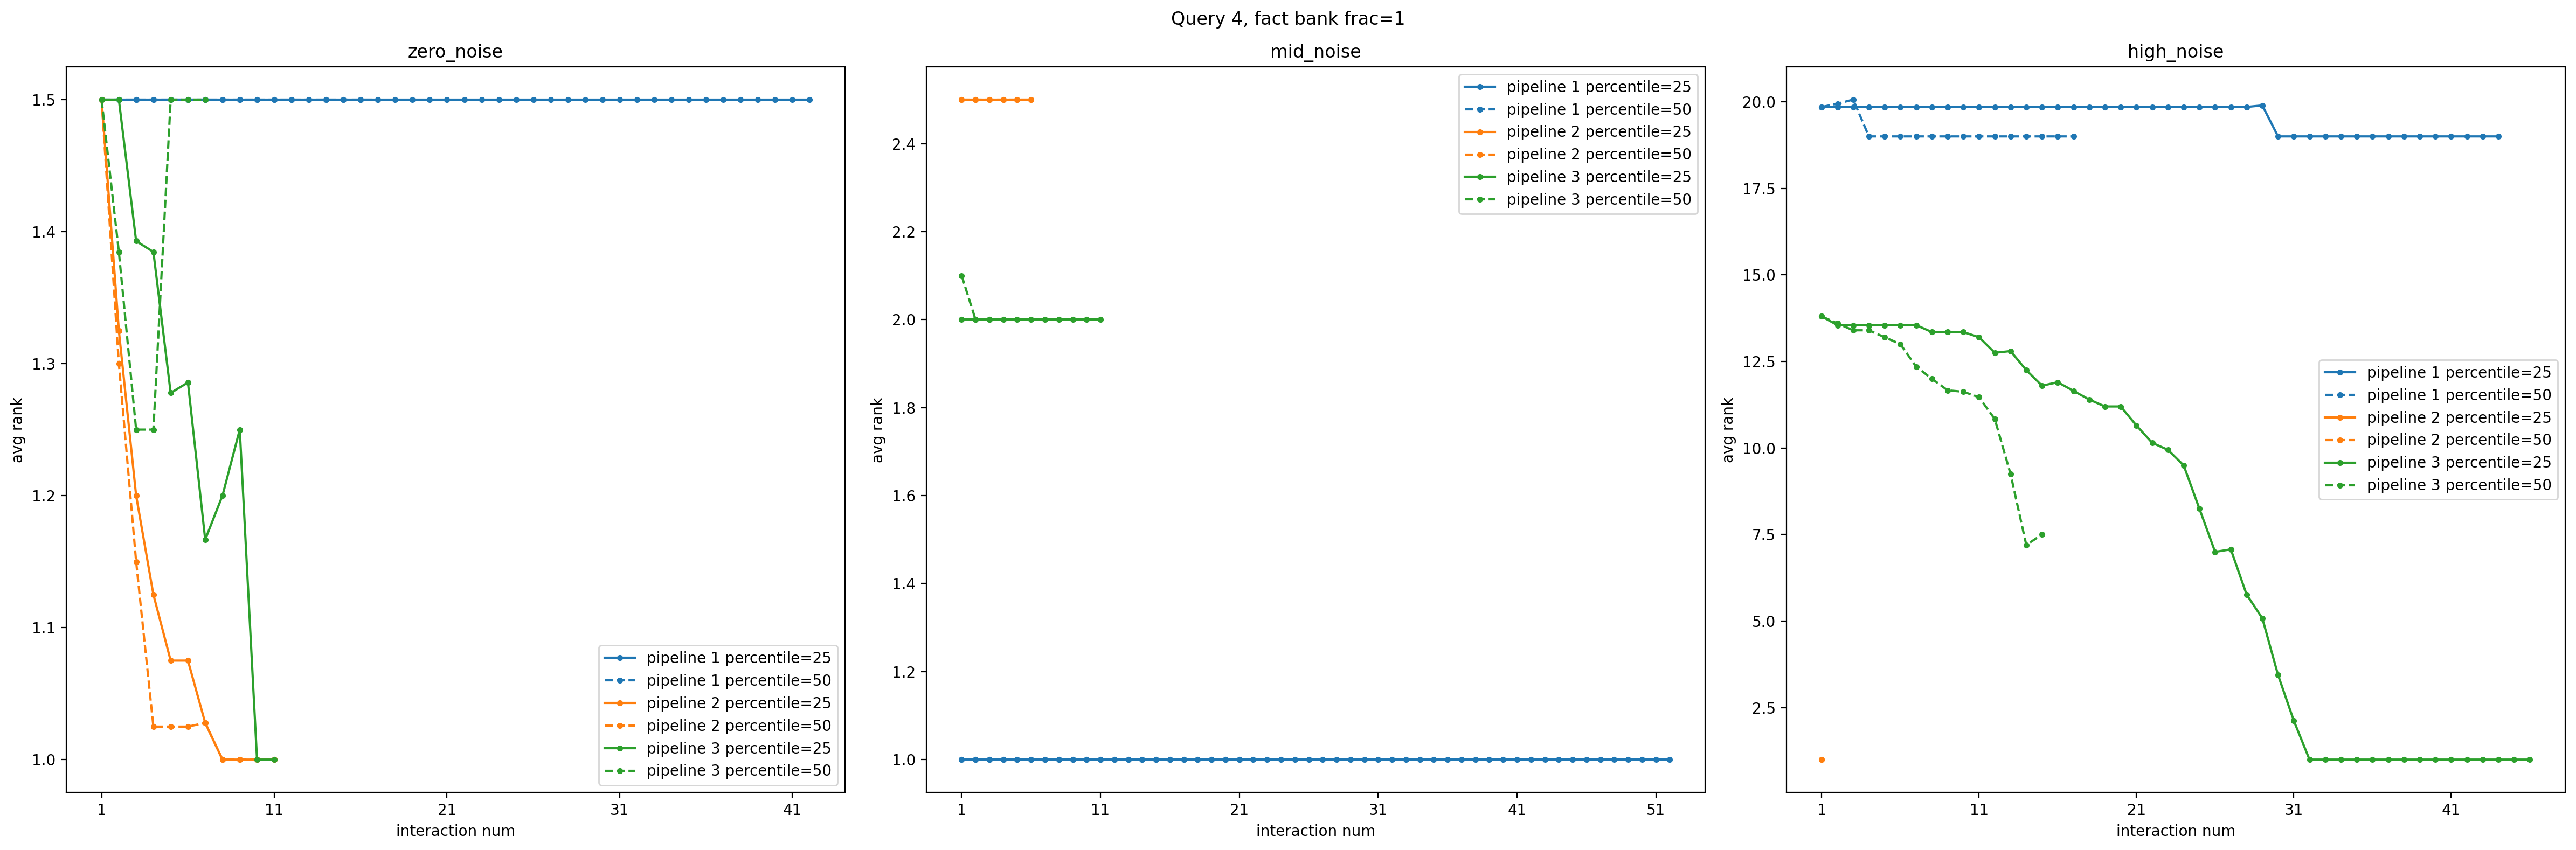

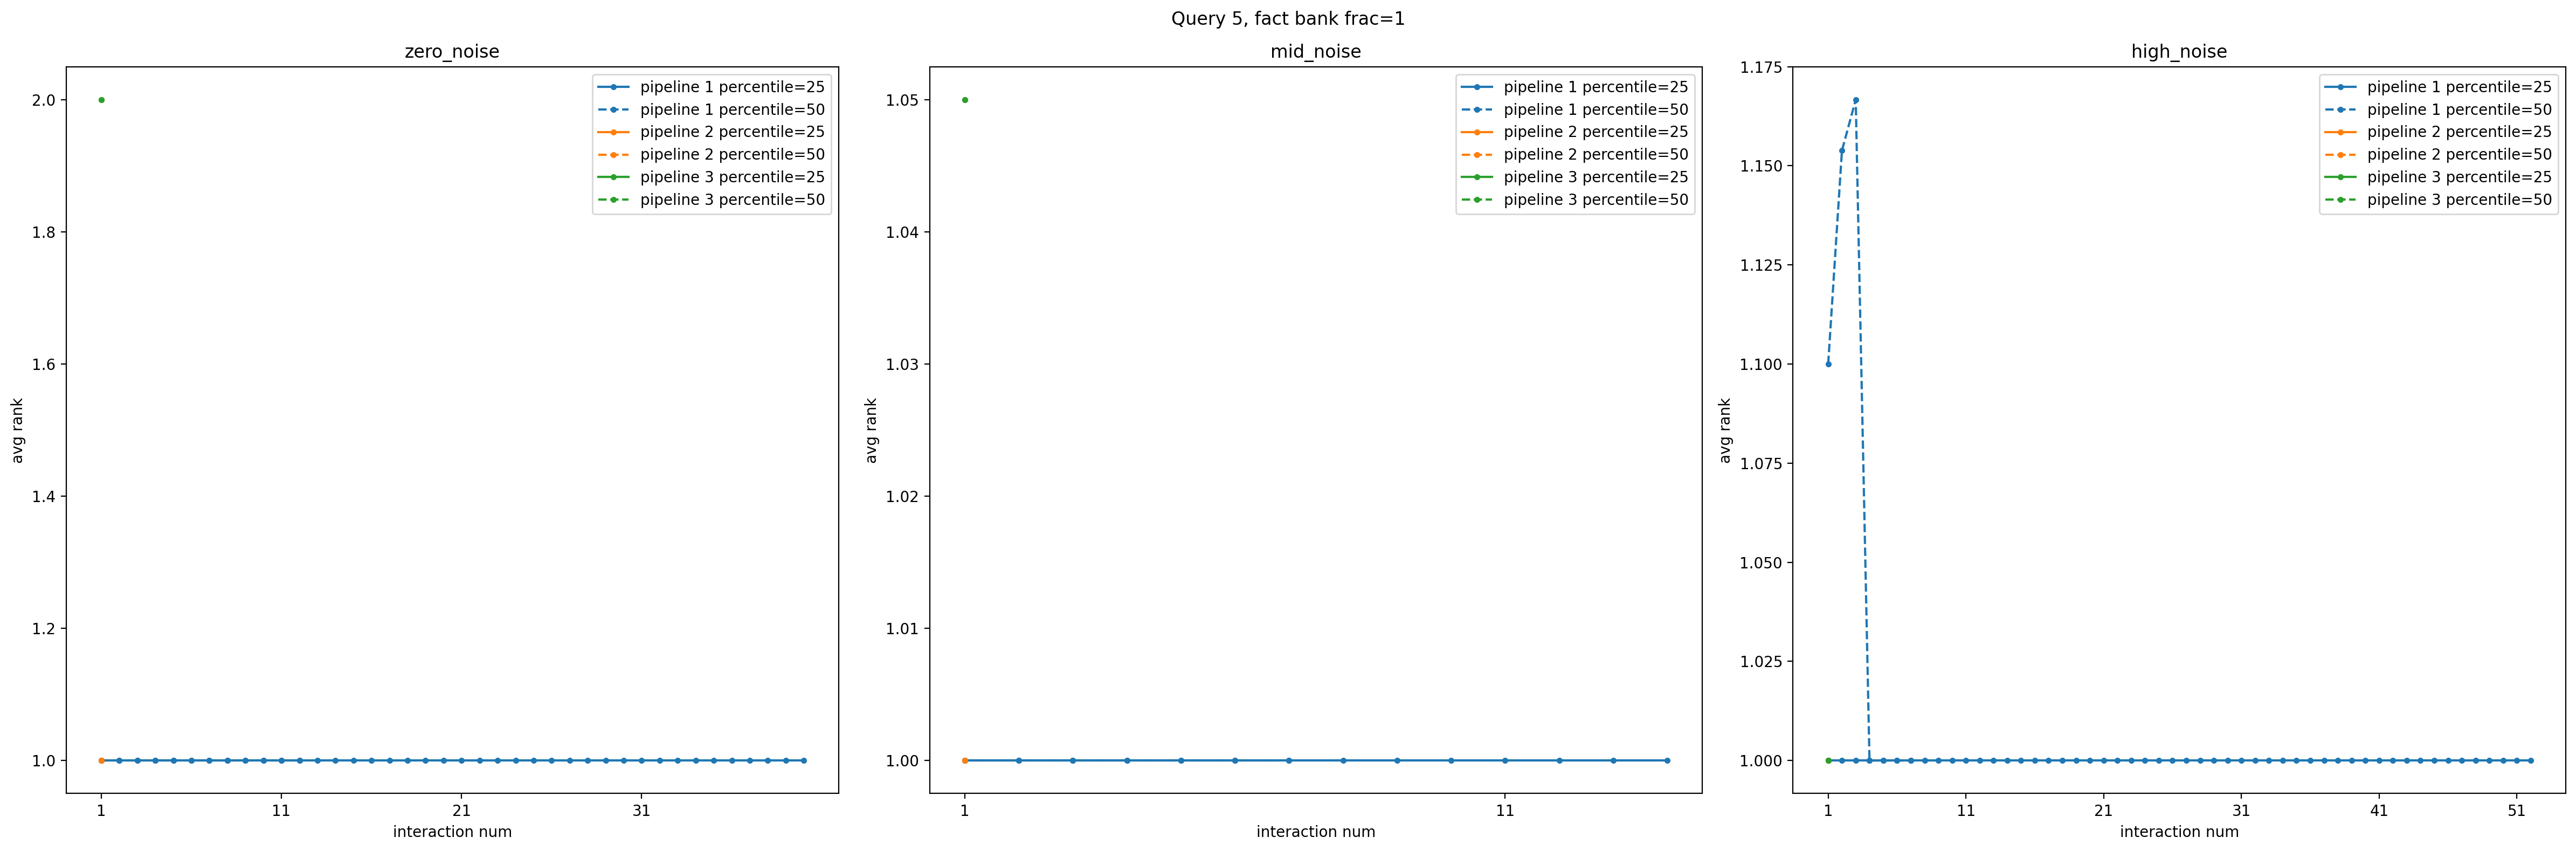

In [73]:
from collections import defaultdict

# colors = ['b', 'r', 'g']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:3]
# print(colors)
percentiles = [25, 50]
line_styles = ['-', '--']
root_dir = "./presentation_results_chembl/new_fact_bank_50/"
num_runs = 20
fact_bank_frac = 1
percentile = 25

fig_time, axs_time = plt.subplots(1, 6, figsize=(48, 8))
# axs_time_idx = [(0, 0), (0, 1), (0, 2)]
for query in range(6):
    query_dir = root_dir + "chembl_gt" + str(query) + "/"

    time_groups = ["zero_noise", "mid_noise", "high_noise"]
    times = defaultdict(lambda: defaultdict(list))

    fig, axs = plt.subplots(1, 3, figsize=(24, 8))

    for i, noise in enumerate(["zero_noise", "mid_noise", "high_noise"]):
        # print(noise + "\n")
        noise_dir = query_dir + noise + "/"
        sample_dir = noise_dir + "sample0/"

        max_num_interactions = -1
        avg_ranks = {}

        for pipeline in range(1, 4):
            # print("pipeline " + str(pipeline))
            dir_path = sample_dir + "result" + str(pipeline) + "/"
            avg_ranks[pipeline] = {}

            file_4c = open(dir_path + "log.txt", "r")
            lines = file_4c.readlines()
            time_before_view_pre = float(lines[0].split(sep=':')[-1])
            time_4c = float(lines[1].split(sep=':')[-1])
            file_4c.close()
            # print("Total time before view presentation:" + str(time_before_view_pre))
            # print("4c time: ", str(time_4c))
            # print()

            result_by_top_percentile_path = dir_path + "result_by_top_percentile.npy"
            result_by_top_percentile = np.load(result_by_top_percentile_path)

            time_by_top_percentile_path = dir_path + "time_by_top_percentile.npy"
            time_by_top_percentile = np.load(time_by_top_percentile_path)

            avg_ranks[pipeline] = {}
            for j, percentile in enumerate(percentiles):
                ground_truth_rank = result_by_top_percentile[j]
                avg_ground_truth_rank = np.nanmean(ground_truth_rank, axis=0)
                avg_ranks[pipeline][percentile] = avg_ground_truth_rank

                if avg_ground_truth_rank.size > max_num_interactions:
                    max_num_interactions = avg_ground_truth_rank.size

                time = time_by_top_percentile[j]
                avg_time = np.mean(time, axis=0)
                # print("avg presentation time(s): ", str(avg_time))
                total_time = time_before_view_pre + time_4c + avg_time
                # print("total time(s): ", str(total_time))
                # print()
                times[pipeline][percentile].append(total_time)

        # fig, ax = plt.subplots()
        x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

        for pipeline in range(1, 4):
            color = colors[pipeline - 1]
            for percentile, line_style in zip(percentiles, line_styles):
                label = "pipeline " + str(pipeline) + " percentile=" + str(percentile)
                y = avg_ranks[pipeline][percentile]
                if y.size < max_num_interactions:
                    y = np.concatenate((y, np.full(max_num_interactions - y.size, np.nan)))
                axs[i].plot(x_axis, y, color=color, linestyle=line_style, marker='o', markersize=3, label=label)

        axs[i].legend()
        axs[i].set_title(noise)
        # axs[i].set_title("Avg ground truth rank over " + str(num_runs) + " runs (" + noise + ")\n" +
        #              "frac bank frac=" + str(fact_bank_frac) + ", percentile=" + str(percentile))
        axs[i].set_xticks(x_axis[::10])

    for ax in axs.flat:
        ax.set(xlabel='interaction num', ylabel='avg rank')
    # for ax in axs.flat:
    #     ax.label_outer()
    fig.suptitle("Query " + str(query) + ", fact bank frac=" + str(fact_bank_frac))
    fig.tight_layout()
    plt.show(fig)
    fig.savefig(query_dir + "avg_rank")
    plt.close(fig)

    x = np.arange(len(time_groups))  # the label locations
    width = 0.25  # the width of the bars

    # fig, ax = plt.subplots()
    time_ax = axs_time[query]
    rects1 = time_ax.bar(x - width, times[1][25], width, label="pipeline 1")
    rects2 = time_ax.bar(x, times[2][25], width, label="pipeline 2")
    rects3 = time_ax.bar(x + width, times[3][25], width, label="pipeline 3")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_ylabel('time(s)')
    time_ax.set_title("Query " + str(query) + " Total time")
    time_ax.set_xticks(x)
    time_ax.set_xticklabels(time_groups)
    time_ax.legend()

for ax in axs_time.flat:
    ax.set(ylabel='time(s)')
    # ax.label_outer()

fig_time.tight_layout()
fig_time.savefig(root_dir + "time")
plt.show(fig_time)
plt.close(fig_time)



eval

In [64]:

from collections import defaultdict

# colors = ['b', 'r', 'g']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:3]
# print(colors)
percentiles = [25, 50]
line_styles = ['-', '--']
root_dir = "./presentation_results_wdc/fact_bank_100/"
num_runs = 20
fact_bank_frac = 1
percentile = 25

for query in range(5):

    print("\n")
    print("query " + str(query))

    query_dir = root_dir + "wdc_gt" + str(query) + "/"

    time_groups = ["zero_noise", "mid_noise", "high_noise"]
    times = defaultdict(lambda: defaultdict(list))

    for i, noise in enumerate(["zero_noise", "mid_noise", "high_noise"]):
        print(noise)
        noise_dir = query_dir + noise + "/"
        sample_dir = noise_dir + "sample0/"

        max_num_interactions = -1
        avg_ranks = {}

        for pipeline in range(1, 4):
            # print("pipeline " + str(pipeline))
            dir_path = sample_dir + "result" + str(pipeline) + "/"
            avg_ranks[pipeline] = {}

            file_4c = open(dir_path + "log.txt", "r")
            lines = file_4c.readlines()
            time_before_view_pre = float(lines[0].split(sep=':')[-1])
            time_4c = float(lines[1].split(sep=':')[-1])
            file_4c.close()
            # print("Total time before view presentation:" + str(time_before_view_pre))
            # print("4c time: ", str(time_4c))
            # print()

            result_by_top_percentile_path = dir_path + "result_by_top_percentile.npy"
            result_by_top_percentile = np.load(result_by_top_percentile_path)

            time_by_top_percentile_path = dir_path + "time_by_top_percentile.npy"
            time_by_top_percentile = np.load(time_by_top_percentile_path)

            avg_ranks[pipeline] = {}
            for j, percentile in enumerate(percentiles):
                ground_truth_rank = result_by_top_percentile[j]
                avg_ground_truth_rank = np.nanmean(ground_truth_rank, axis=0)

                num_inter_to_reach_top_5 = np.nan
                for k, rank in enumerate(list(avg_ground_truth_rank), 1):
                    if rank <= 5:
                        num_inter_to_reach_top_5 = k
                        break
                if percentile == 25:
                    print(str(num_inter_to_reach_top_5))

                avg_ranks[pipeline][percentile] = avg_ground_truth_rank

                if avg_ground_truth_rank.size > max_num_interactions:
                    max_num_interactions = avg_ground_truth_rank.size

                time = time_by_top_percentile[j]
                avg_time = np.mean(time, axis=0)
                # print("avg presentation time(s): ", str(avg_time))
                total_time = time_before_view_pre + time_4c + avg_time
                # print("total time(s): ", str(total_time))
                # print()
                times[pipeline][percentile].append(total_time)



query 0
zero_noise
1
1
1
mid_noise
1
1
1
high_noise
1
1
1


query 1
zero_noise
2
1
1
mid_noise
1
1
1
high_noise
6
1
11


query 2
zero_noise
19
1
2
mid_noise
20
1
1
high_noise
2
1
1


query 3
zero_noise
1
1
1
mid_noise
1
1
1
high_noise
1
1
1


query 4
zero_noise
1
1
1
mid_noise
1
1
1
high_noise
1
1
1


In [35]:


from collections import defaultdict

root_dir = "./presentation_results_wdc_5_27/"
num_runs = 20
sample_sizes = [1, 5, 10]
initialize_scores = ["zero", "s4"]
fact_bank_fractions = [10, 50, 100]

result = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for query in range(5):

    print("\n")
    print("query " + str(query))

    query_dir = root_dir + "wdc_gt" + str(query) + "/"

    time_groups = ["zero_noise", "mid_noise", "high_noise"]
    times = defaultdict(list)

    for i, noise in enumerate(["zero_noise", "mid_noise", "high_noise"]):
        print("\n")
        print(noise)
        noise_dir = query_dir + noise + "/"
        sample_dir = noise_dir + "sample0/"

        result_per_pipeline = []
        std_num_inter_to_reach_top_5_by_pipeline = []

        for pipeline in range(1, 4):
            if pipeline != 3:
                continue
            # print("\n")
            # print("pipeline " + str(pipeline))

            for fact_bank_fraction in fact_bank_fractions:

                for initialize_score in initialize_scores:

                    for sample_size in sample_sizes:

                        # if query != 4 or noise != "mid_noise" or pipeline != 3 or fact_bank_fraction != 100 or initialize_score != "s4" or sample_size != 1:
                        #     continue

                        dir_path = sample_dir + "result" + str(pipeline) + "/"

                        file_4c = open(dir_path + "log.txt", "r")
                        lines = file_4c.readlines()
                        time_before_view_pre = float(lines[0].split(sep=':')[-1])
                        time_4c = float(lines[1].split(sep=':')[-1])
                        num_views_after_pruning = int(lines[4].split(sep=':')[-1])
                        file_4c.close()

                        result_path = dir_path + "result" + "_" + str(fact_bank_fraction) + "_" + initialize_score + "_" + str(sample_size) + ".npy"
                        ground_truth_rank = np.load(result_path)

                        time_path = dir_path + "time" + "_" + str(fact_bank_fraction) + "_" + initialize_score + "_" + str(sample_size) + ".npy"
                        time = np.load(time_path)

                        # avg_ground_truth_rank = np.nanmean(ground_truth_rank, axis=0)
                        sum_num_inter_to_reach_top_5 = 0
                        num_inter_to_reach_top_5_list = []
                        # count_num_inter_to_reach_top_5 = 0
                        for ground_truth_rank_per_run in ground_truth_rank:
                            # print(ground_truth_rank_per_run)
                            reached = False
                            for k, rank in enumerate(list(ground_truth_rank_per_run), 1):
                                if rank <= 5 or abs(rank - 5) <= 1e-6:
                                    sum_num_inter_to_reach_top_5 += k
                                    # count_num_inter_to_reach_top_5 += 1
                                    # print(k)
                                    reached = True
                                    num_inter_to_reach_top_5_list.append(k)
                                    break
                            if reached == False:
                                sum_num_inter_to_reach_top_5 += num_views_after_pruning
                                num_inter_to_reach_top_5_list.append(num_views_after_pruning)
                        avg_num_inter_to_reach_top_5 = float(sum_num_inter_to_reach_top_5)/num_runs
                        std_num_inter_to_reach_top_5 = np.std(num_inter_to_reach_top_5_list)
                        std_num_inter_to_reach_top_5_by_pipeline.append(std_num_inter_to_reach_top_5)
                        # if count_num_inter_to_reach_top_5 != 0:
                        #     avg_num_inter_to_reach_top_5 = float(sum_num_inter_to_reach_top_5)/count_num_inter_to_reach_top_5
                        # else:
                        #     avg_num_inter_to_reach_top_5 = np.nan

                        # num_inter_to_reach_top_5 = np.nan
                        # for k, rank in enumerate(list(avg_ground_truth_rank), 1):
                        #     if rank <= 5:
                        #         num_inter_to_reach_top_5 = k
                        #         break

                        result[noise][pipeline][query].append(avg_num_inter_to_reach_top_5)
                        # print("fact_bank_frac="+str(fact_bank_fraction), initialize_score, "sample_size="+str(sample_size),str(avg_num_inter_to_reach_top_5))
                        result_per_pipeline.append(avg_num_inter_to_reach_top_5)

                        avg_time = np.mean(time, axis=0)
                        # print("avg presentation time(s): ", str(avg_time))
                        total_time = time_before_view_pre + time_4c + avg_time
                        # print("total time(s): ", str(total_time))
                        # print()
                        times[pipeline].append(total_time)

        print(result_per_pipeline)
        print(std_num_inter_to_reach_top_5_by_pipeline)

import pprint
# pprint.pprint(result)
# print(result)




query 0


zero_noise
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


mid_noise
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


high_noise
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


query 1


zero_noise
[21.55, 15.05, 32.1, 4.0, 6.05, 4.75, 23.15, 24.7, 43.65, 4.55, 2.9, 2.2, 8.05, 6.4, 14.7, 2.9, 3.6, 1.0]
[16.56947494641879, 17.2321646928063, 23.851415052361148, 9.181503144910424, 13.024880037835281, 9.50197347923051, 32.03166402171451, 33.20406601607701, 34.358805276086066, 8.059001178806216, 8.281907992727279, 5.230678732248809, 9.03590061919674, 6.514598989960933, 19.8244798

EVAL -- informativeness of a signal

chembl


query 0


zero_noise
38 6.5 36 6.5 False
normalized s4:  0.18055555555555555
normalized final:  0.027777777777777776


mid_noise
20 5.0 18 5.0 False
normalized s4:  0.2777777777777778
normalized final:  0.09444444444444444


high_noise
33 13.5 31 13.5 False
normalized s4:  0.43548387096774194
normalized final:  0.75


query 1


zero_noise
59 6.5 54 5.0 False
normalized s4:  0.09259259259259259
normalized final:  0.06759259259259259


mid_noise
32 14.5 30 13.0 False
normalized s4:  0.43333333333333335
normalized final:  0.435


high_noise
41 30.5 35 25.0 False
normalized s4:  0.7142857142857143
normalized final:  0.5385714285714286


query 2


zero_noise
58 2.0 29 3.0 False
normalized s4:  0.10344827586206896
normalized final:  0.034482758620689655


mid_noise
44 12.0 17 5.0 False
normalized s4:  0.29411764705882354
normalized final:  0.15882352941176472


high_noise
44 11.0 17 6.0 False
normalized s4:  0.35294117647058826
normalized final:  0.2676470588235294


query 3


zero_

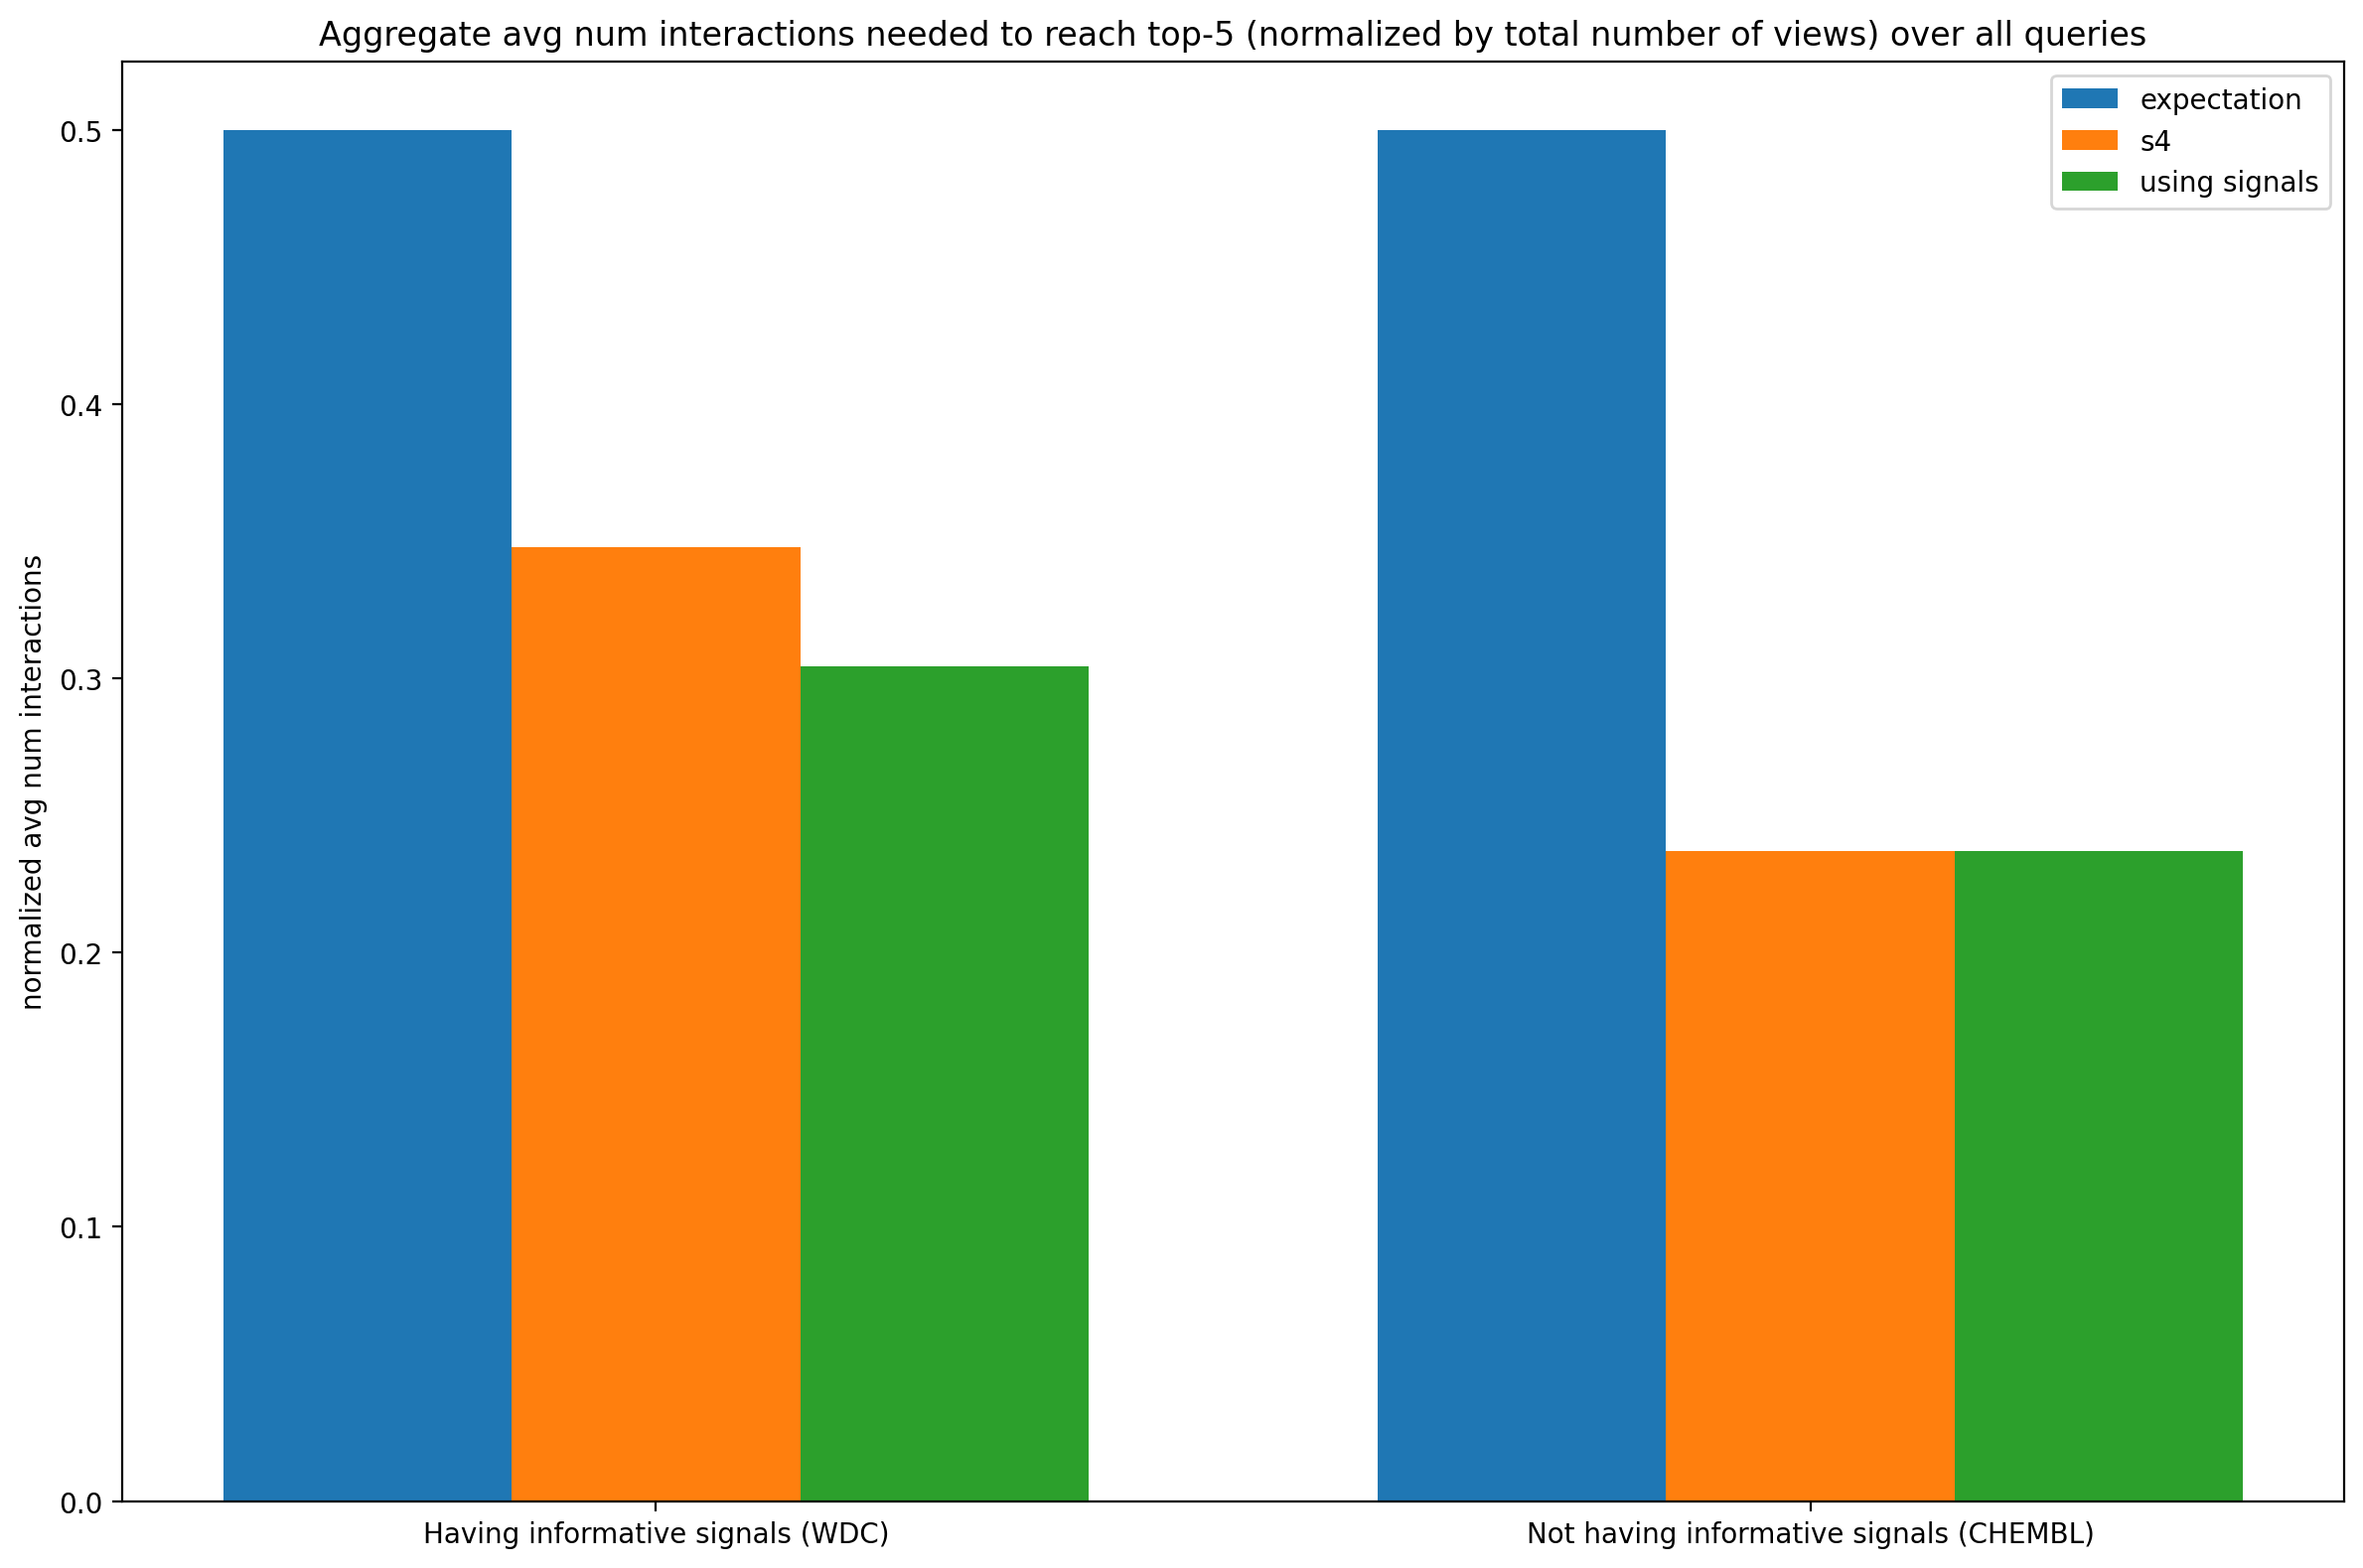

In [34]:
num_runs = 20

def get_eval(data):

    if data == "chembl":
        root_dir = "./presentation_results_chembl_5_27/"
        eval_file = open("./experiments_chembl_5_13/eval.txt", "r")
    if data == "wdc":
        root_dir = "./presentation_results_wdc_5_27/"
        eval_file = open("./experiments_wdc_5_13/eval.txt", "r")

    normalized_s4 = []
    normalized_final = []
    queries = []
    for query in range(5):

        print("\n")
        print("query " + str(query))

        query_dir = root_dir + data + "_gt" + str(query) + "/"

        for i, noise in enumerate(["zero_noise", "mid_noise", "high_noise"]):
            print("\n")
            print(noise)
            noise_dir = query_dir + noise + "/"
            sample_dir = noise_dir + "sample0/"

            pipeline = 3

            eval_line = eval_file.readline()
            eval_linelist = eval_line.split(sep=",")
            num_views_before_pruning, s4_rank_before_pruning,\
            num_views_after_pruning, s4_rank_after_pruning, informative = \
                int(eval_linelist[0]), float(eval_linelist[1]), int(eval_linelist[2]), float(eval_linelist[3]), eval_linelist[4]
            if informative.startswith("not"):
                informative = False
            else:
                informative = True
            print(str(num_views_before_pruning), str(s4_rank_before_pruning),
            str(num_views_after_pruning), str(s4_rank_after_pruning), str(informative))

            if num_views_after_pruning <= 5:
                continue
            if data == "wdc":
                queries.append("Q"+str(query) + "\n" + noise)
            if data == "chembl":
                queries.append("Q"+str(query) + "\n" + noise[:-6])

            fact_bank_fraction = 10
            initialize_score = "s4"
            sample_size = 1

            dir_path = sample_dir + "result" + str(pipeline) + "/"
            result_path = dir_path + "result" + "_" + str(fact_bank_fraction) + "_" + initialize_score + "_" + str(sample_size) + ".npy"
            ground_truth_rank = np.load(result_path)

            sum_num_inter_to_reach_top = 0
            # count_num_inter_to_reach_top = 0
            top_k = 5
            for ground_truth_rank_per_run in ground_truth_rank:
                # print(len(ground_truth_rank_per_run))
                reached = False
                for k, rank in enumerate(list(ground_truth_rank_per_run), 1):
                    if rank <= top_k or abs(rank - top_k) <= 1e-6:
                        sum_num_inter_to_reach_top += k
                        reached = True
                        # count_num_inter_to_reach_top += 1
                        break
                if not reached:
                    sum_num_inter_to_reach_top += num_views_after_pruning
            avg_num_inter_to_reach_top = float(sum_num_inter_to_reach_top)/len(ground_truth_rank)
            # if count_num_inter_to_reach_top != 0:
            #     avg_num_inter_to_reach_top = float(sum_num_inter_to_reach_top)/count_num_inter_to_reach_top
            # else:
            #     avg_num_inter_to_reach_top = np.nan

            normalize_s4 = s4_rank_after_pruning / num_views_after_pruning
            normalized_s4.append(normalize_s4)
            print("normalized s4: ", str(normalize_s4))
            normalize_final = avg_num_inter_to_reach_top / num_views_after_pruning
            if np.isnan(normalize_final) or normalize_final > 1:
                normalize_final = 1.0
            normalized_final.append(normalize_final)
            print("normalized final: ", str(normalize_final))
    return queries, normalized_s4, normalized_final

print("chembl")
chembl_queries, chembl_normalized_s4, chembl_normalized_final = get_eval("chembl")
print("\nwdc")
wdc_queries, wdc_normalized_s4, wdc_normalized_final = get_eval("wdc")

print()
chembl_average_normalize_s4 = np.mean(chembl_normalized_s4)
chembl_average_normalize_final = np.mean(chembl_normalized_final)
print(str(chembl_average_normalize_s4), str(chembl_average_normalize_final))
wdc_average_normalize_s4 = np.mean(wdc_normalized_s4)
wdc_average_normalize_final = np.mean(wdc_normalized_final)
print(str(wdc_average_normalize_s4), str(wdc_average_normalize_final))

labels = ["Having informative signals (WDC)", "Not having informative signals (CHEMBL)"]
expectation = [0.5, 0.5]
s4 = [wdc_average_normalize_s4, chembl_average_normalize_s4]
using_signals = [wdc_average_normalize_final, chembl_average_normalize_s4]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, expectation, width, label='expectation')
rects1 = ax.bar(x, s4, width, label='s4')
rects2 = ax.bar(x + width, using_signals, width, label='using signals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized avg num interactions')
ax.set_title('Aggregate avg num interactions needed to reach top-5 (normalized by total number of views) over all queries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
fig.savefig("./test_dir/agg_informative")
plt.close()


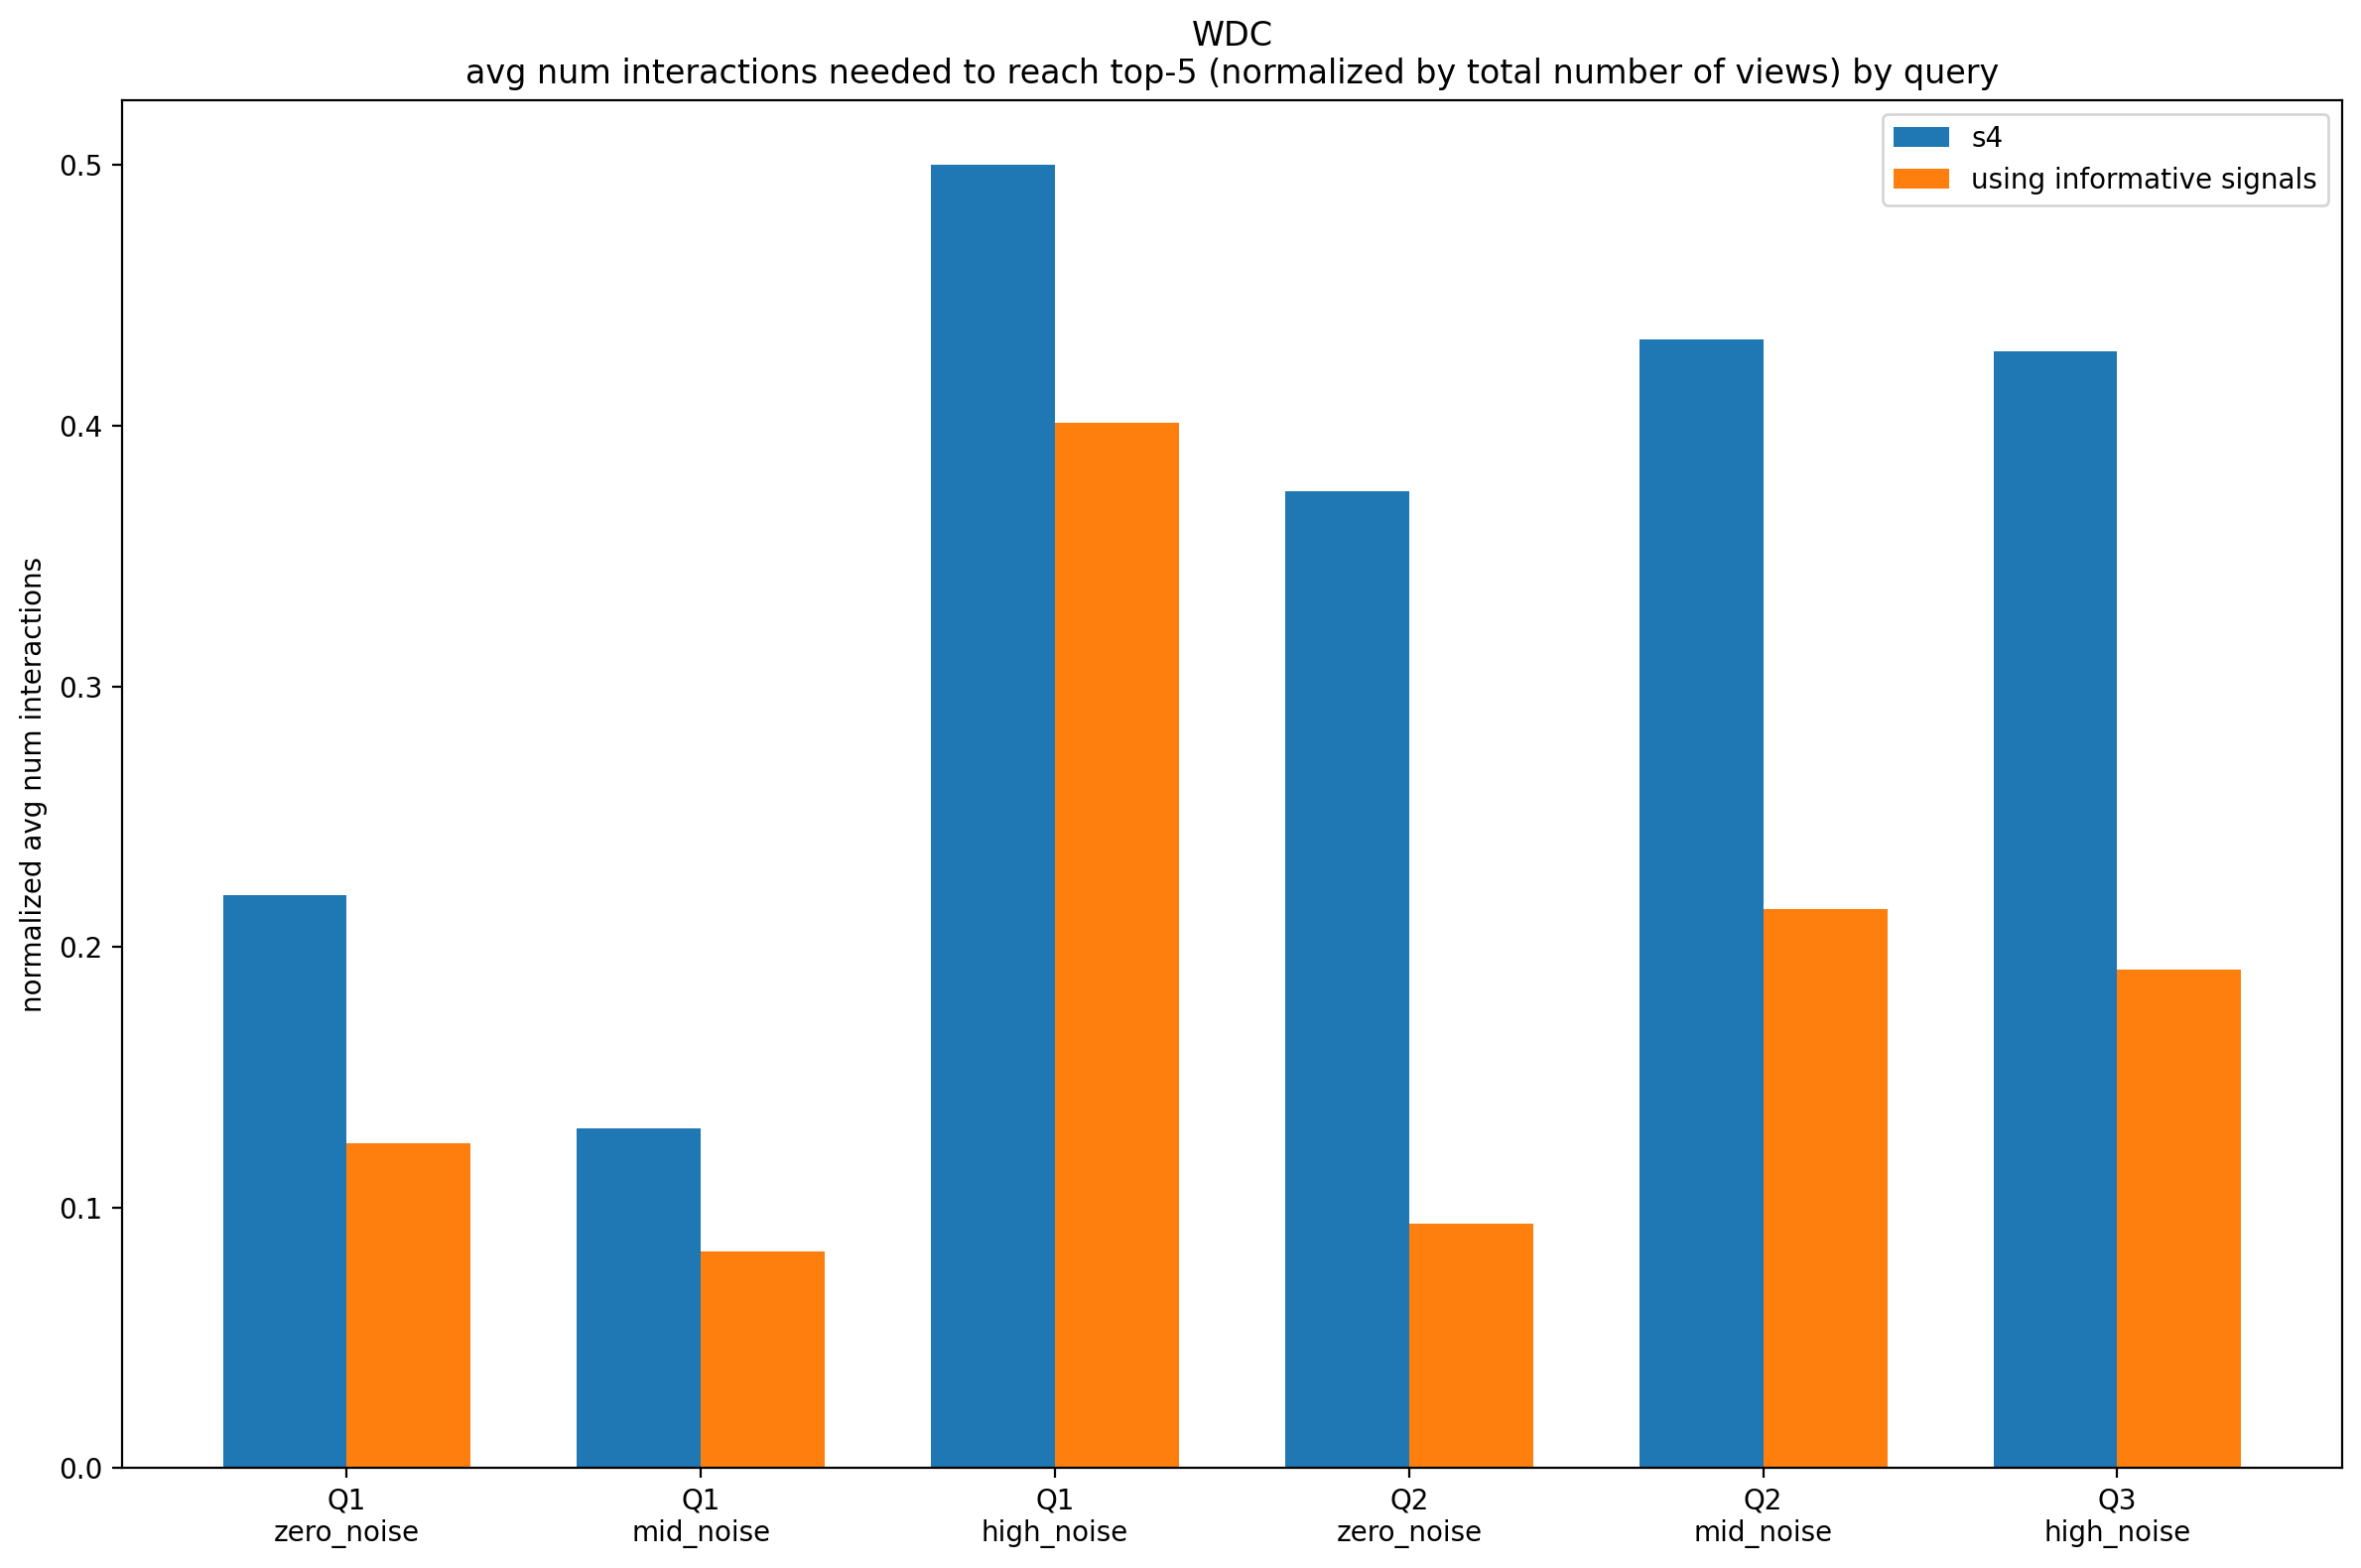

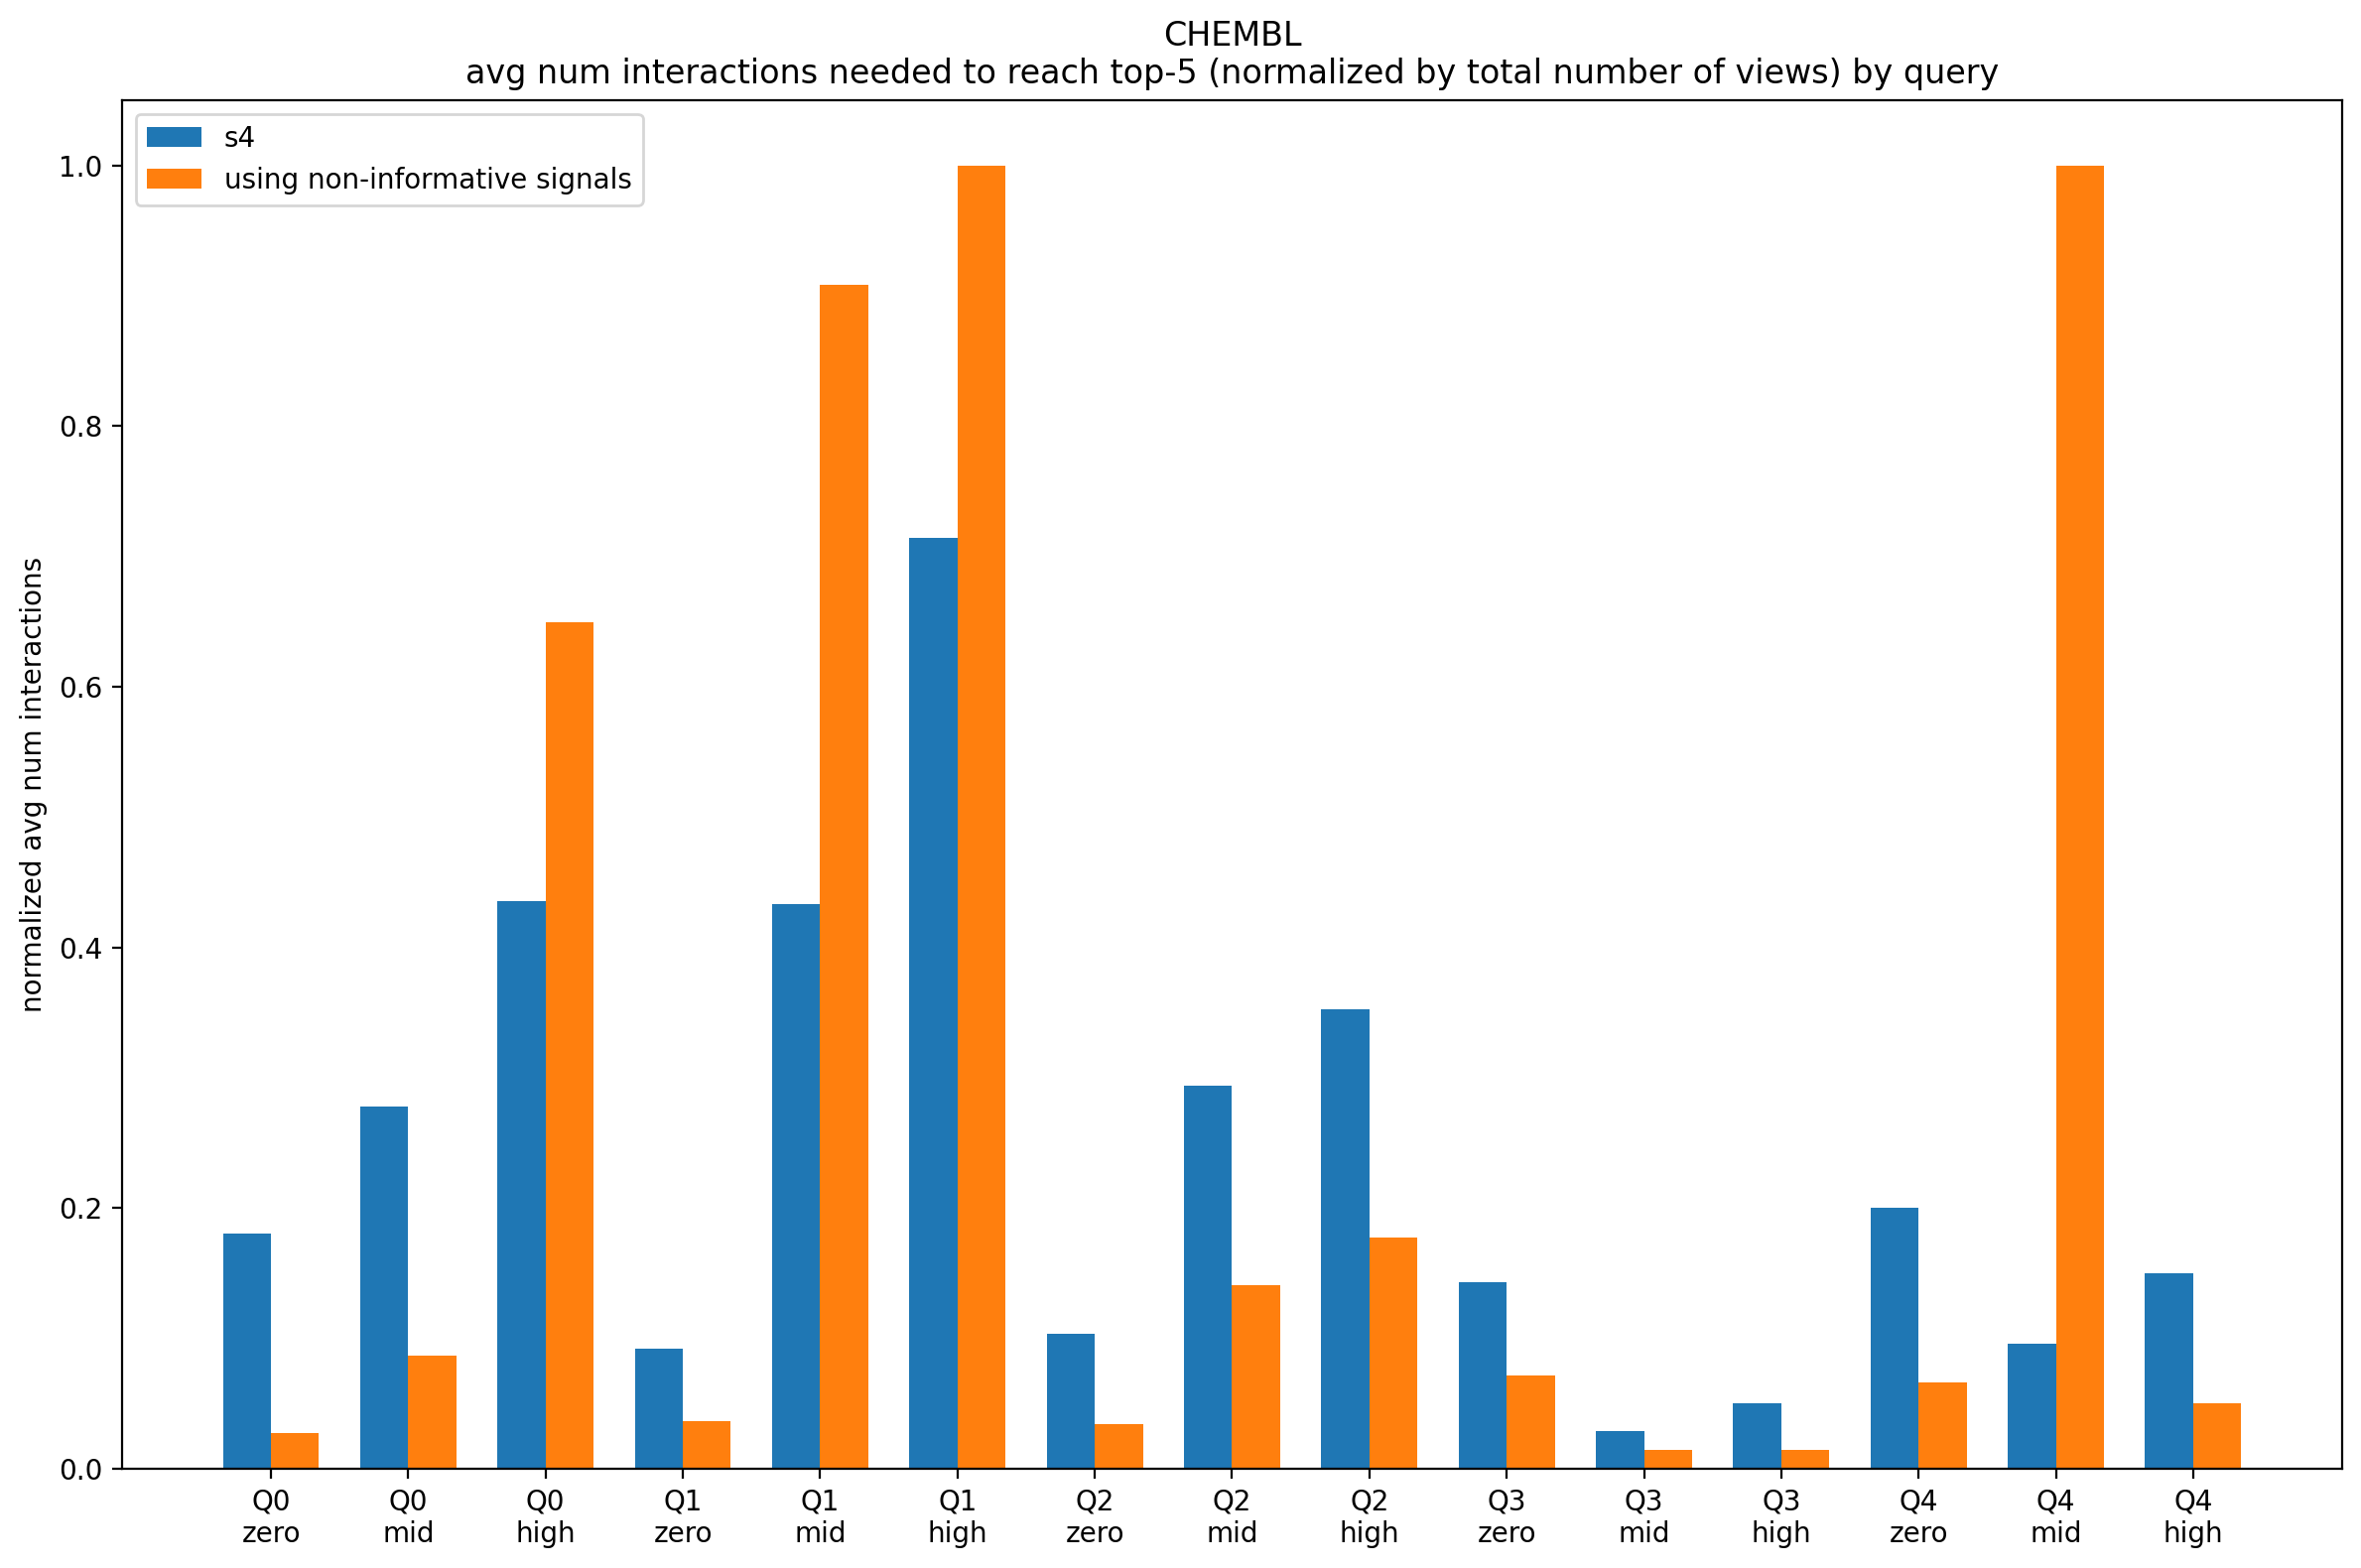

In [4]:
x = np.arange(len(wdc_queries))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, wdc_normalized_s4, width, label='s4')
ax.bar(x + width/2, wdc_normalized_final, width, label='using informative signals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized avg num interactions')
ax.set_title('WDC\navg num interactions needed to reach top-5 (normalized by total number of views) by query')
ax.set_xticks(x)
ax.set_xticklabels(wdc_queries)
ax.legend()

fig.tight_layout()
fig.savefig("./test_dir/informative_by_query_wdc")
plt.show()

x = np.arange(len(chembl_queries))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, chembl_normalized_s4, width, label='s4')
ax.bar(x + width/2, chembl_normalized_final, width, label='using non-informative signals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized avg num interactions')
ax.set_title('CHEMBL\navg num interactions needed to reach top-5 (normalized by total number of views) by query')
ax.set_xticks(x)
ax.set_xticklabels(chembl_queries)
ax.legend()

fig.tight_layout()
fig.savefig("./test_dir/non_informative_by_query_chembl")
plt.show()
plt.close()

EVAL -- informativeness by fact bank

chembl


query 0


zero_noise


10
normalized s4:  0.18055555555555555
normalized final:  0.027777777777777776


50
normalized s4:  0.18055555555555555
normalized final:  0.027777777777777776


100
normalized s4:  0.18055555555555555
normalized final:  0.027777777777777776


mid_noise


10
normalized s4:  0.2777777777777778
normalized final:  0.08666666666666667


50
normalized s4:  0.2777777777777778
normalized final:  0.08555555555555555


100
normalized s4:  0.2777777777777778
normalized final:  0.07888888888888888


high_noise


10
normalized s4:  0.43548387096774194
normalized final:  0.6494623655913978


50
normalized s4:  0.43548387096774194
normalized final:  0.5428963623884694


100
normalized s4:  0.43548387096774194
normalized final:  0.605353466026081


query 1


zero_noise


10
normalized s4:  0.09259259259259259
normalized final:  0.037037037037037035


50
normalized s4:  0.09259259259259259
normalized final:  0.03148148148148148


100
normalized s4:  0.09259259259259259


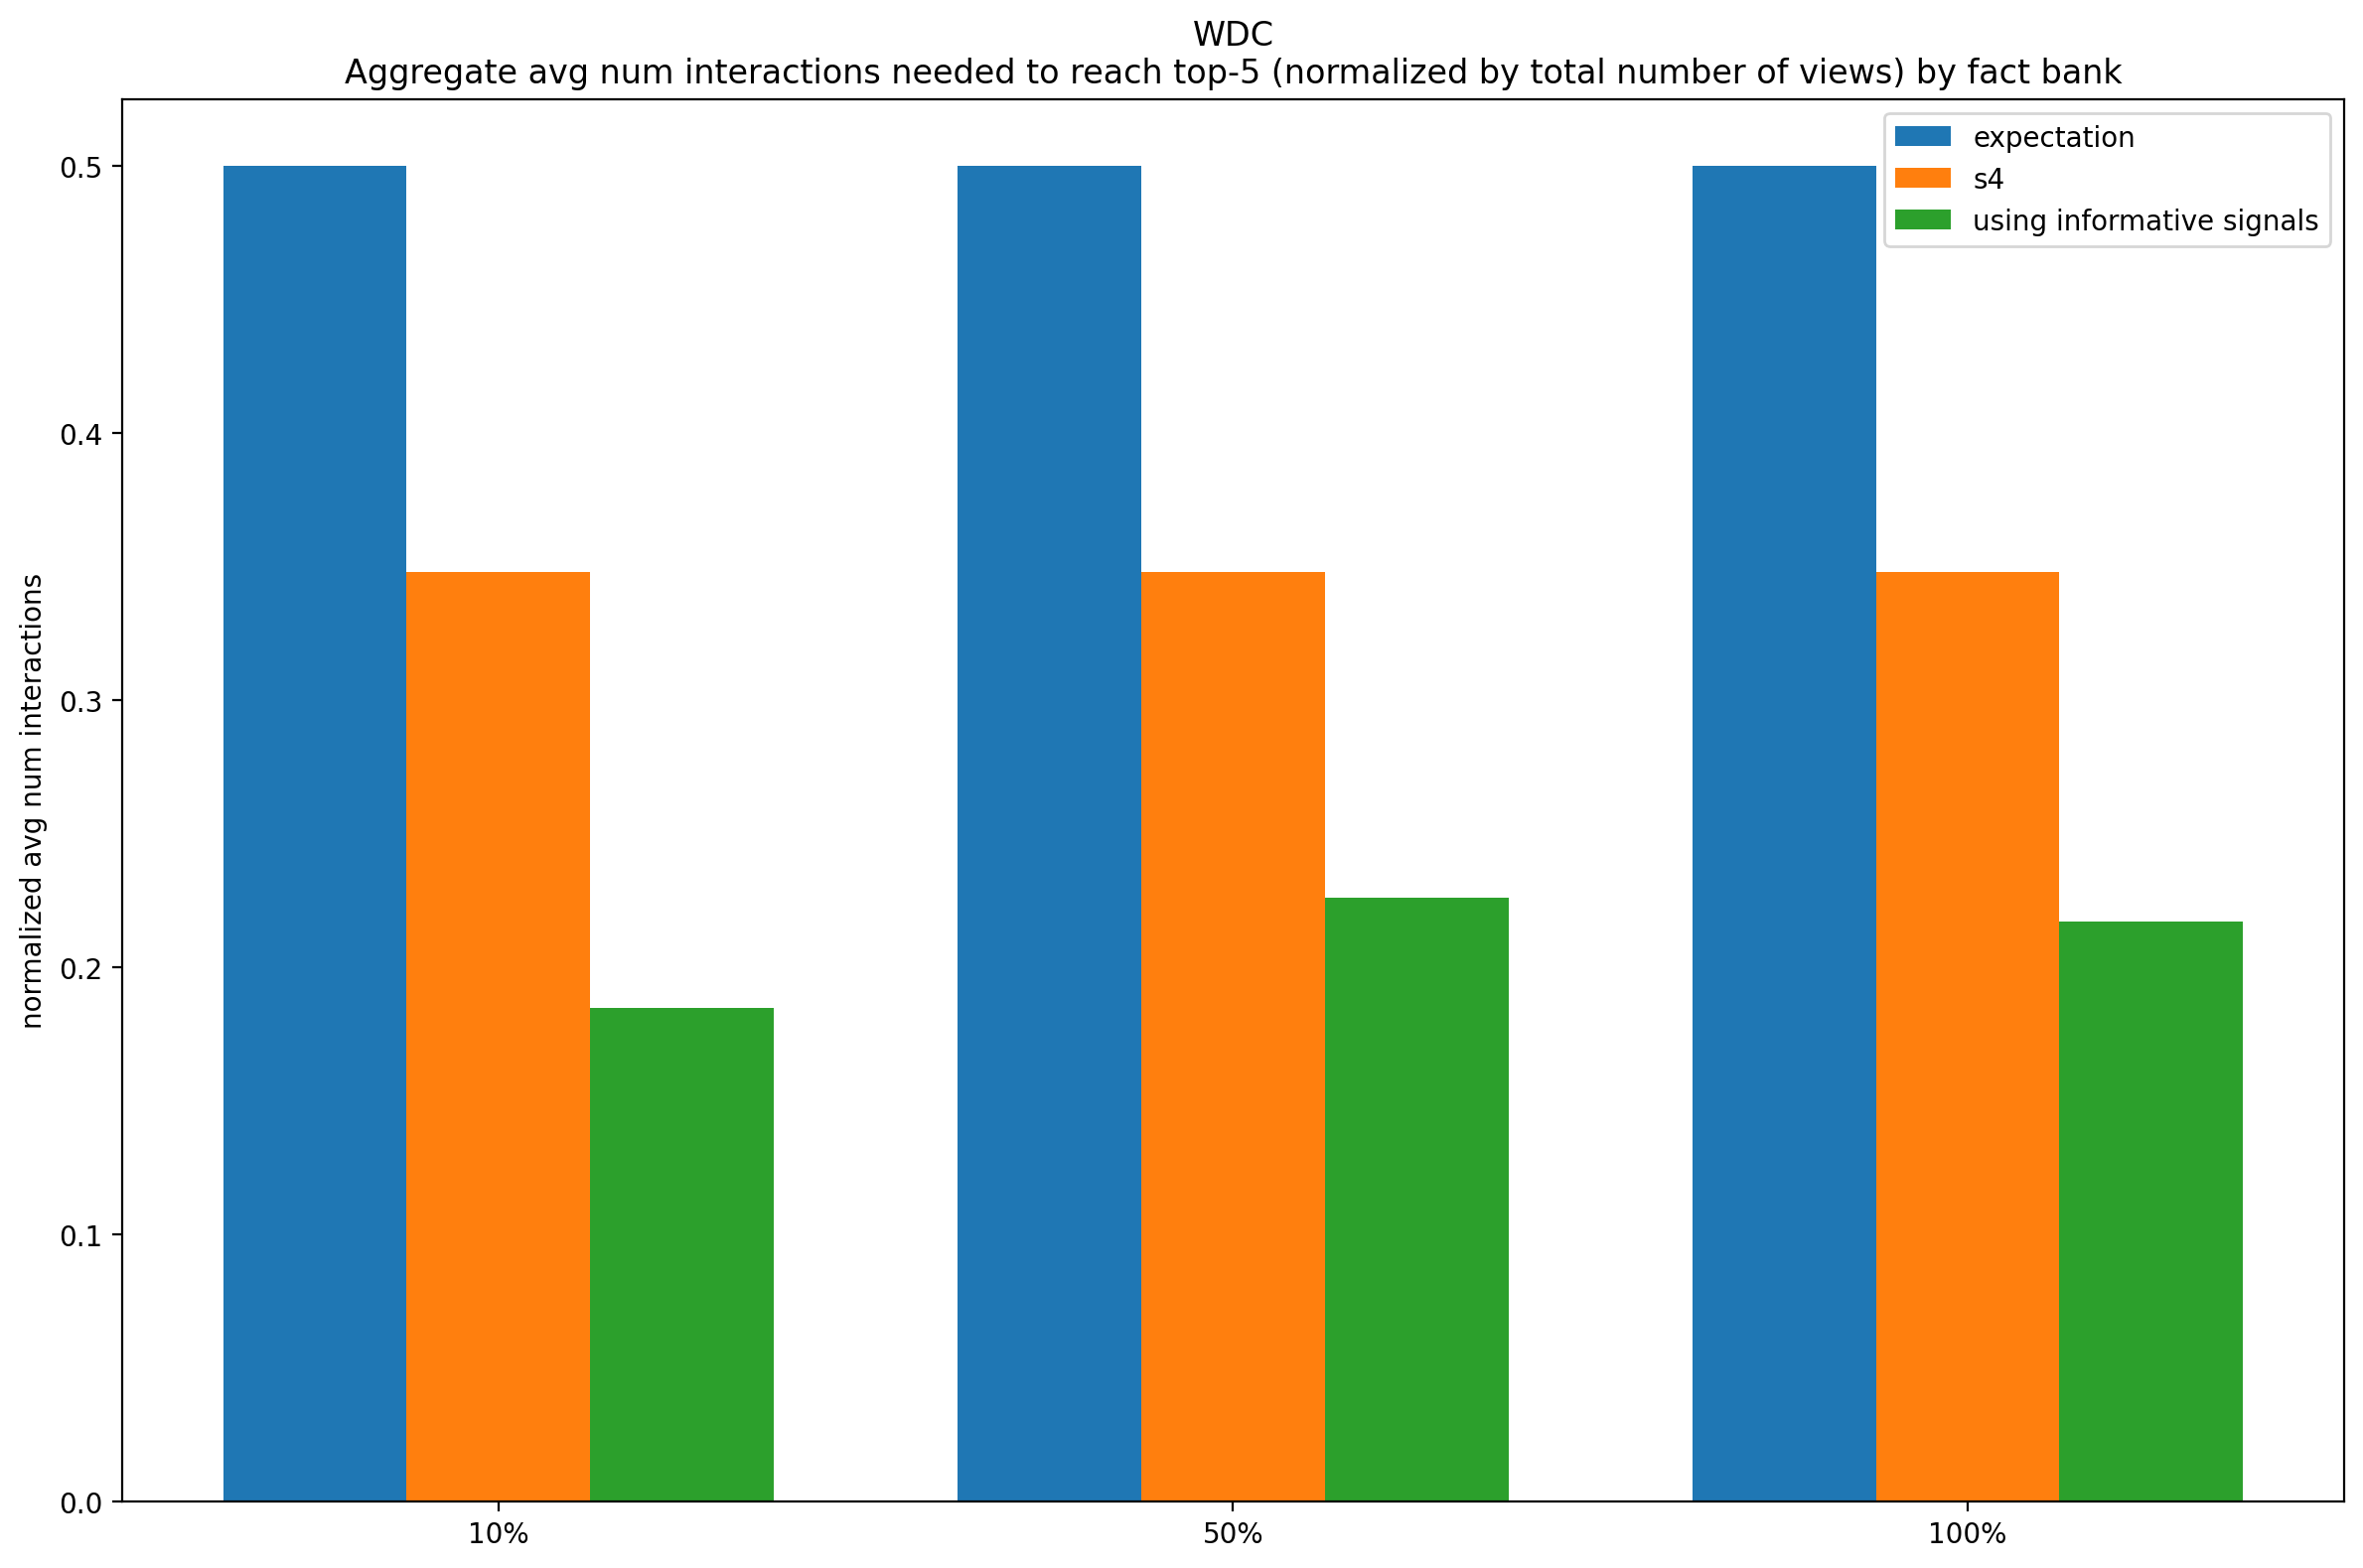

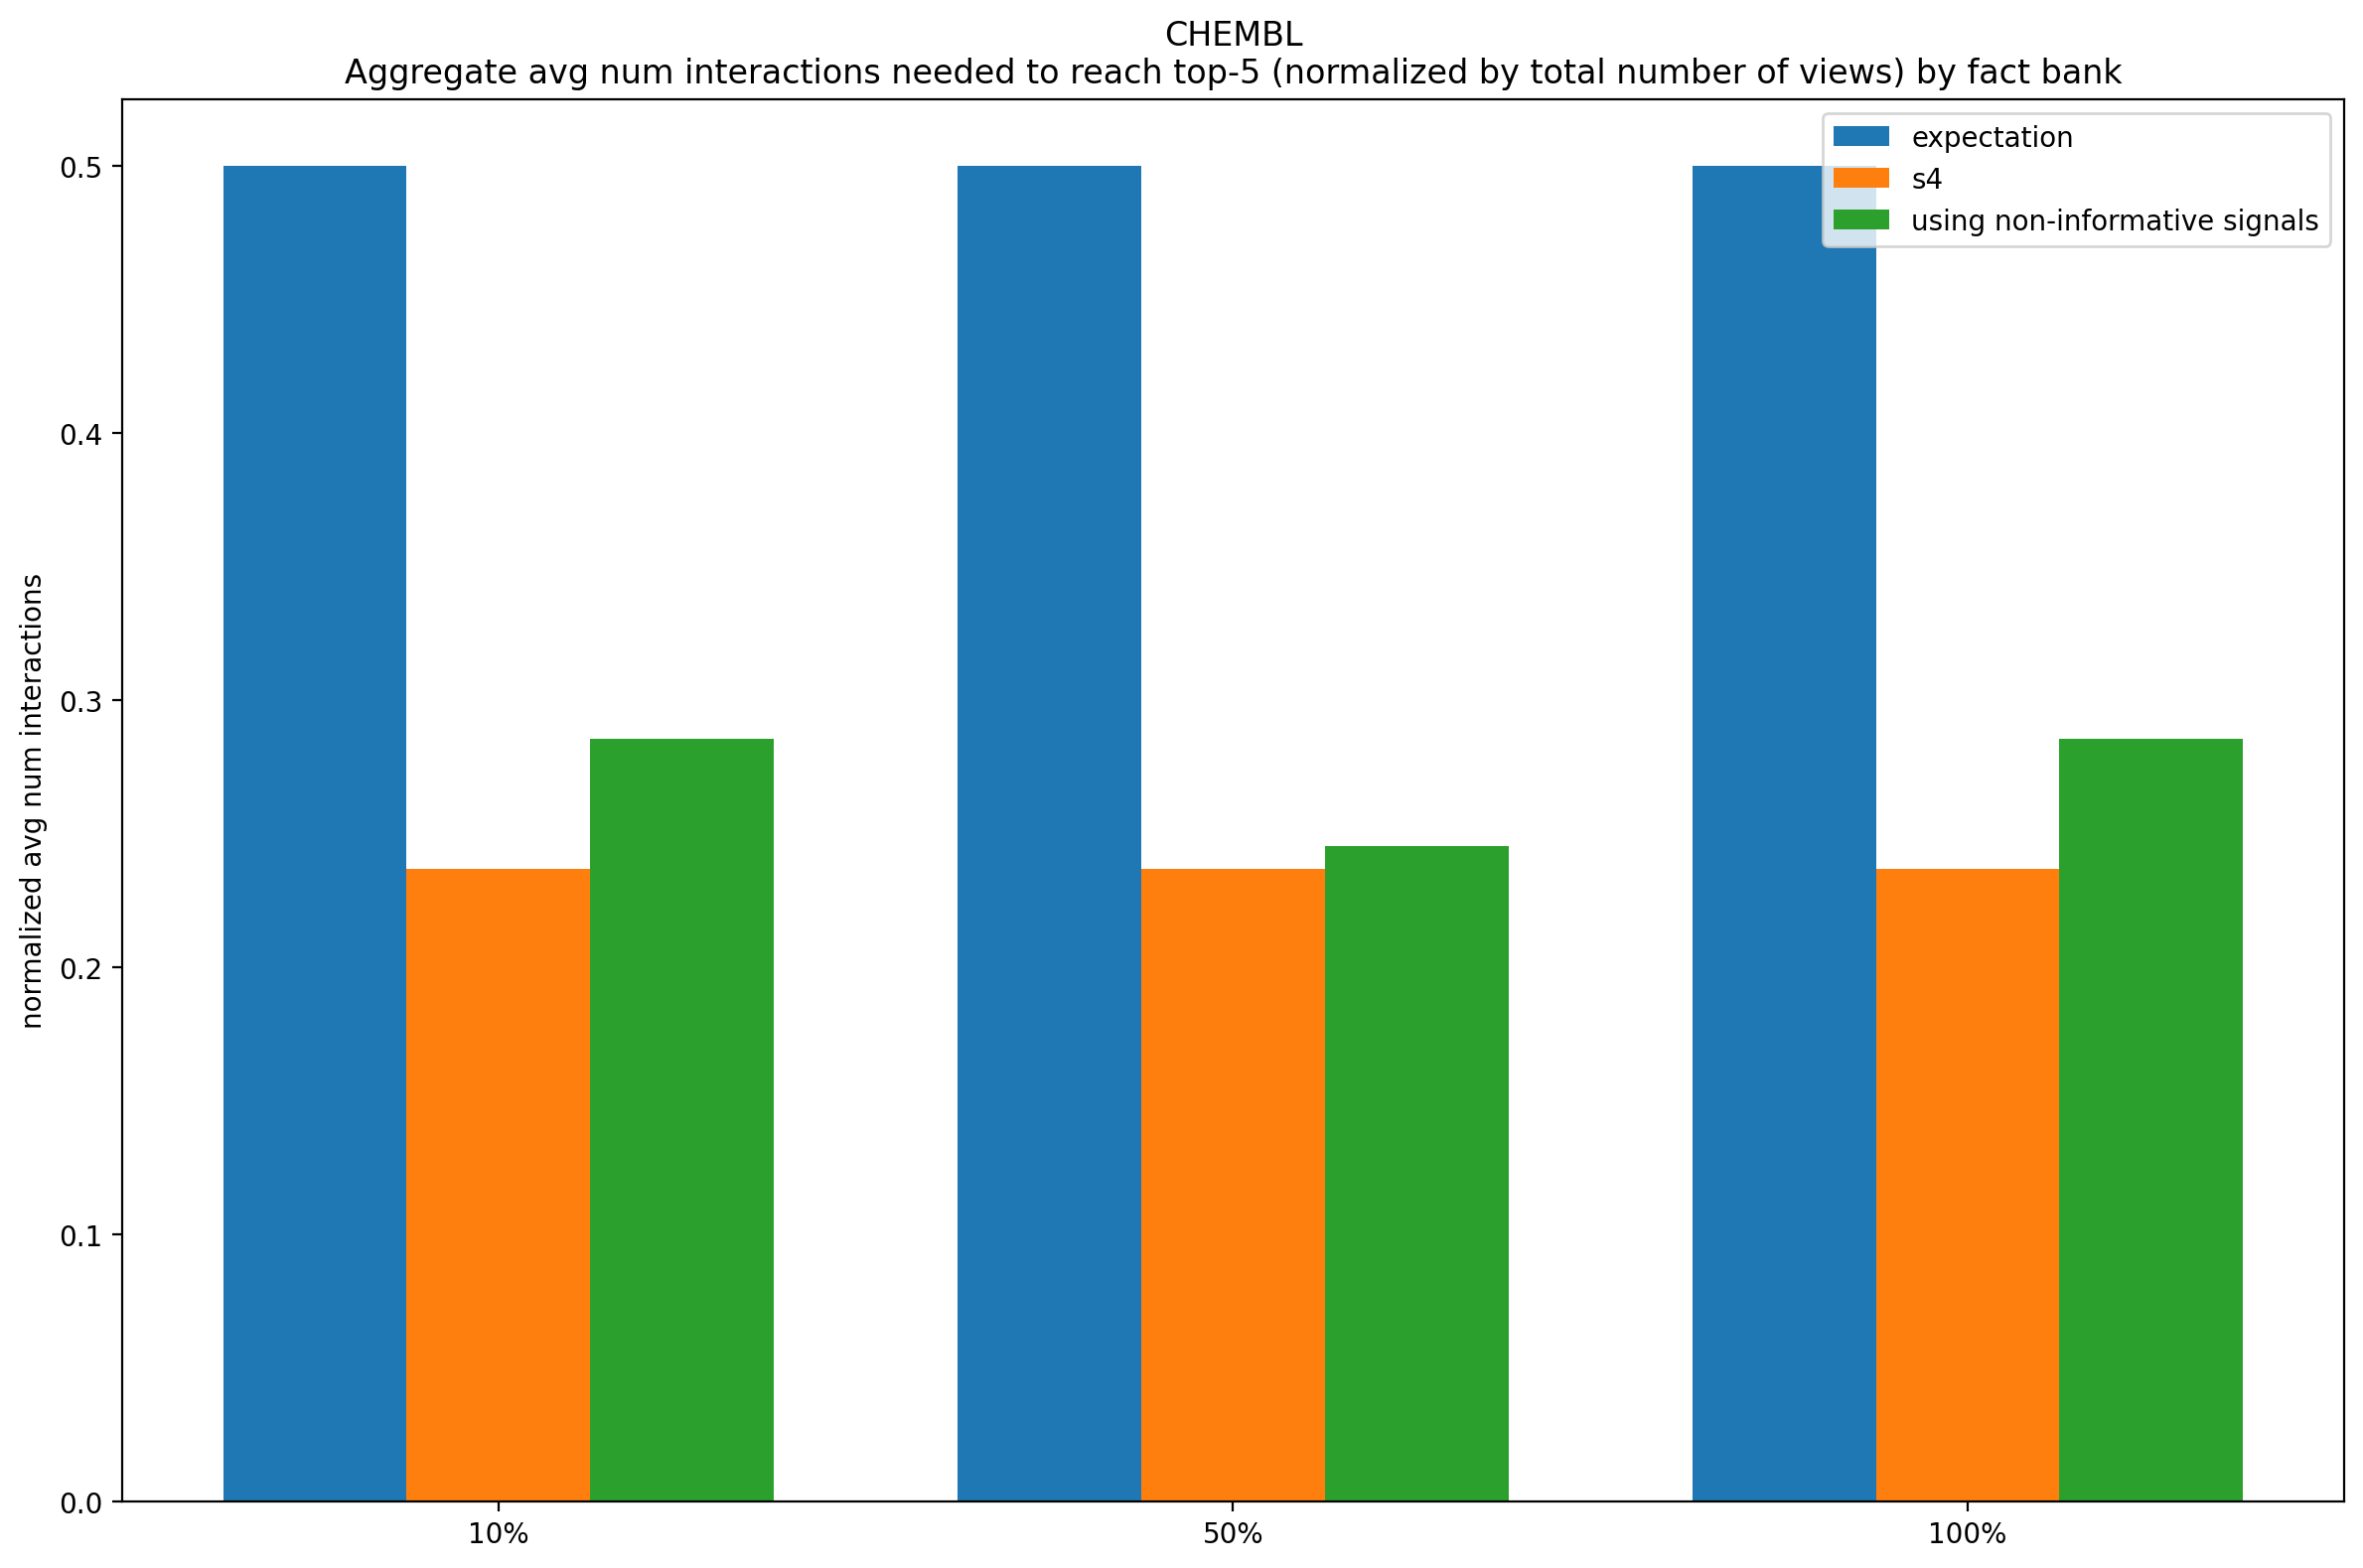

In [5]:
def get_eval_by_fact_bank(data):

    if data == "chembl":
        root_dir = "./presentation_results_chembl_5_14/"
        eval_file = open("./experiments_chembl_5_13/eval.txt", "r")
    if data == "wdc":
        root_dir = "./presentation_results_wdc_5_14/"
        eval_file = open("./experiments_wdc_5_13/eval.txt", "r")

    normalized_s4 = []
    normalized_final = []
    queries = []
    for query in range(5):

        print("\n")
        print("query " + str(query))

        query_dir = root_dir + data + "_gt" + str(query) + "/"

        for i, noise in enumerate(["zero_noise", "mid_noise", "high_noise"]):
            print("\n")
            print(noise)
            noise_dir = query_dir + noise + "/"
            sample_dir = noise_dir + "sample0/"

            pipeline = 3

            eval_line = eval_file.readline()
            eval_linelist = eval_line.split(sep=",")
            num_views_before_pruning, s4_rank_before_pruning,\
            num_views_after_pruning, s4_rank_after_pruning, informative = \
                int(eval_linelist[0]), float(eval_linelist[1]), int(eval_linelist[2]), float(eval_linelist[3]), eval_linelist[4]
            if informative.startswith("not"):
                informative = False
            else:
                informative = True
            # print(str(num_views_before_pruning), str(s4_rank_before_pruning),
            # str(num_views_after_pruning), str(s4_rank_after_pruning), str(informative))

            if num_views_after_pruning <= 5:
                continue
            if data == "wdc":
                queries.append("Q"+str(query) + "\n" + noise)
            if data == "chembl":
                queries.append("Q"+str(query) + "\n" + noise[:-6])

            initialize_score = "s4"
            sample_size = 1
            normalized_s4_by_fact_bank = []
            normalized_final_by_fact_bank = []

            for fact_bank_fraction in [10, 50, 100]:

                print("\n")
                print(str(fact_bank_fraction))

                dir_path = sample_dir + "result" + str(pipeline) + "/"
                result_path = dir_path + "result" + "_" + str(fact_bank_fraction) + "_" + initialize_score + "_" + str(sample_size) + ".npy"
                ground_truth_rank = np.load(result_path)

                sum_num_inter_to_reach_top = 0
                count_num_inter_to_reach_top = 0
                top_k = 5
                for ground_truth_rank_per_run in ground_truth_rank:
                    # print(len(ground_truth_rank_per_run))
                    for k, rank in enumerate(list(ground_truth_rank_per_run), 1):
                        if rank <= top_k or abs(rank - top_k) <= 1e-6:
                            sum_num_inter_to_reach_top += k
                            count_num_inter_to_reach_top += 1
                            break
                if count_num_inter_to_reach_top != 0:
                    avg_num_inter_to_reach_top = float(sum_num_inter_to_reach_top)/count_num_inter_to_reach_top
                else:
                    avg_num_inter_to_reach_top = np.nan

                normalize_s4 = s4_rank_after_pruning / num_views_after_pruning
                normalized_s4_by_fact_bank.append(normalize_s4)
                print("normalized s4: ", str(normalize_s4))
                normalize_final = avg_num_inter_to_reach_top / num_views_after_pruning
                if np.isnan(normalize_final) or normalize_final > 1:
                    normalize_final = 1.0
                normalized_final_by_fact_bank.append(normalize_final)
                print("normalized final: ", str(normalize_final))

            normalized_s4.append(normalized_s4_by_fact_bank)
            normalized_final.append(normalized_final_by_fact_bank)

    return queries, normalized_s4, normalized_final

print("chembl")
chembl_queries, chembl_normalized_s4, chembl_normalized_final = get_eval_by_fact_bank("chembl")
print("\nwdc")
wdc_queries, wdc_normalized_s4, wdc_normalized_final = get_eval_by_fact_bank("wdc")

print()
chembl_average_normalize_s4_by_fact_bank = np.mean(np.array(chembl_normalized_s4), axis=0)
chembl_average_normalize_final_by_fact_bank = np.mean(np.array(chembl_normalized_final), axis=0)
wdc_average_normalize_s4_by_fact_bank = np.mean(np.array(wdc_normalized_s4), axis=0)
wdc_average_normalize_final_by_fact_bank = np.mean(np.array(wdc_normalized_final), axis=0)

labels = ["10%", "50%", "100%"]
expectation = [0.5, 0.5, 0.5]
# s4 = [wdc_average_normalize_s4, chembl_average_normalize_s4]
# using_signals = [wdc_average_normalize_final, chembl_average_normalize_s4]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, expectation, width, label='expectation')
rects1 = ax.bar(x, wdc_average_normalize_s4_by_fact_bank, width, label='s4')
rects2 = ax.bar(x + width, wdc_average_normalize_final_by_fact_bank, width, label='using informative signals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized avg num interactions')
ax.set_title('WDC\nAggregate avg num interactions needed to reach top-5 (normalized by total number of views) by fact bank')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
fig.savefig("./test_dir/agg_informative_by_fact_bank_wdc")
plt.close()

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, expectation, width, label='expectation')
rects1 = ax.bar(x, chembl_average_normalize_s4_by_fact_bank, width, label='s4')
rects2 = ax.bar(x + width, chembl_average_normalize_final_by_fact_bank, width, label='using non-informative signals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized avg num interactions')
ax.set_title('CHEMBL\nAggregate avg num interactions needed to reach top-5 (normalized by total number of views) by fact bank')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
fig.savefig("./test_dir/agg_non_informative_by_fact_bank_chembl")
plt.close()


In [7]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:3]

eval_file = open("./experiments_wdc_5_13/eval.txt", "r")
eval_file_lines = eval_file.readlines()
worst_cases = []
best_cases = []
for line in eval_file_lines:
    start_idx = [pos for pos, char in enumerate(line) if char == "["]
    end_idx = [pos for pos, char in enumerate(line) if char == "]"]
    worst_case = line[start_idx[0]+1 : end_idx[0]].split(sep=",")
    worst_case = [int(s) for s in worst_case]
    worst_cases.append(worst_case)
    best_case = line[start_idx[1]+1 : end_idx[1]].split(sep=",")
    best_case = [int(s) for s in best_case]
    best_cases.append(best_case)
worst_cases = [worst_cases[i:i + 3] for i in range(0, len(worst_cases), 3)]
best_cases = [best_cases[i:i + 3] for i in range(0, len(best_cases), 3)]

# print(worst_cases)
# print(best_cases)

fig, ax = plt.subplots(1, 5, figsize=(40, 8))

for i in range(5):
    ax[i].yaxis.get_major_locator().set_params(integer=True)
    max_len = max([len(l) for l in worst_cases[i]])
    x_axis = [j for j in range(max_len)]
    print(x_axis)

    for j, noise in enumerate(["zero", "mid", "high"]):

        worst_case = worst_cases[i][j]
        best_case = best_cases[i][j]

        worst_case += [np.nan] * (len(x_axis) - len(worst_case))
        best_case += [np.nan] * (len(x_axis) - len(best_case))

        print(worst_case)
        print(best_case)

        ax[i].plot(x_axis, worst_case, color=colors[j], linestyle='-', marker='o', label=noise + "(worst case)")
        ax[i].plot(x_axis, best_case, color=colors[j], linestyle='--', marker='o', label=noise + "(best case)")
    ax[i].legend()
    ax[i].set_xticks(x_axis)
# y_ticks = [i for i in range(min(best_case), max(worst_case) + 1)]
# plt.yticks(y_ticks)
# plt.title("Number of views left at each step after pruning using contradictory signals")
plt.tight_layout()
plot_fn = "./test_dir/wdc_num_views_left"
# plt.show()
plt.savefig(plot_fn)
plt.close()

[0, 1, 2]
[3, 2, 1]
[2, 1, nan]
[3, 2, 1]
[2, 1, nan]
[3, 2, 1]
[2, 1, nan]
[0, 1, 2, 3, 4]
[9, 8, 7, 6, nan]
[4, 3, 2, 1, nan]
[5, 4, 3, nan, nan]
[3, 2, 1, nan, nan]
[6, 5, 4, 3, 2]
[5, 4, 3, 2, 1]
[0, 1, 2, 3, 4, 5]
[20, 14, 13, 5, 2, 1]
[1, nan, nan, nan, nan, nan]
[15, 12, 6, 3, 2, 1]
[1, nan, nan, nan, nan, nan]
[5, 3, 2, 1, nan, nan]
[1, nan, nan, nan, nan, nan]
[0, 1, 2, 3, 4]
[3, 2, 1, nan, nan]
[1, nan, nan, nan, nan]
[2, 1, nan, nan, nan]
[1, nan, nan, nan, nan]
[7, 6, 5, 2, 1]
[1, nan, nan, nan, nan]
[0, 1, 2]
[3, 2, 1]
[2, 1, nan]
[3, 2, 1]
[2, 1, nan]
[3, 2, 1]
[2, 1, nan]


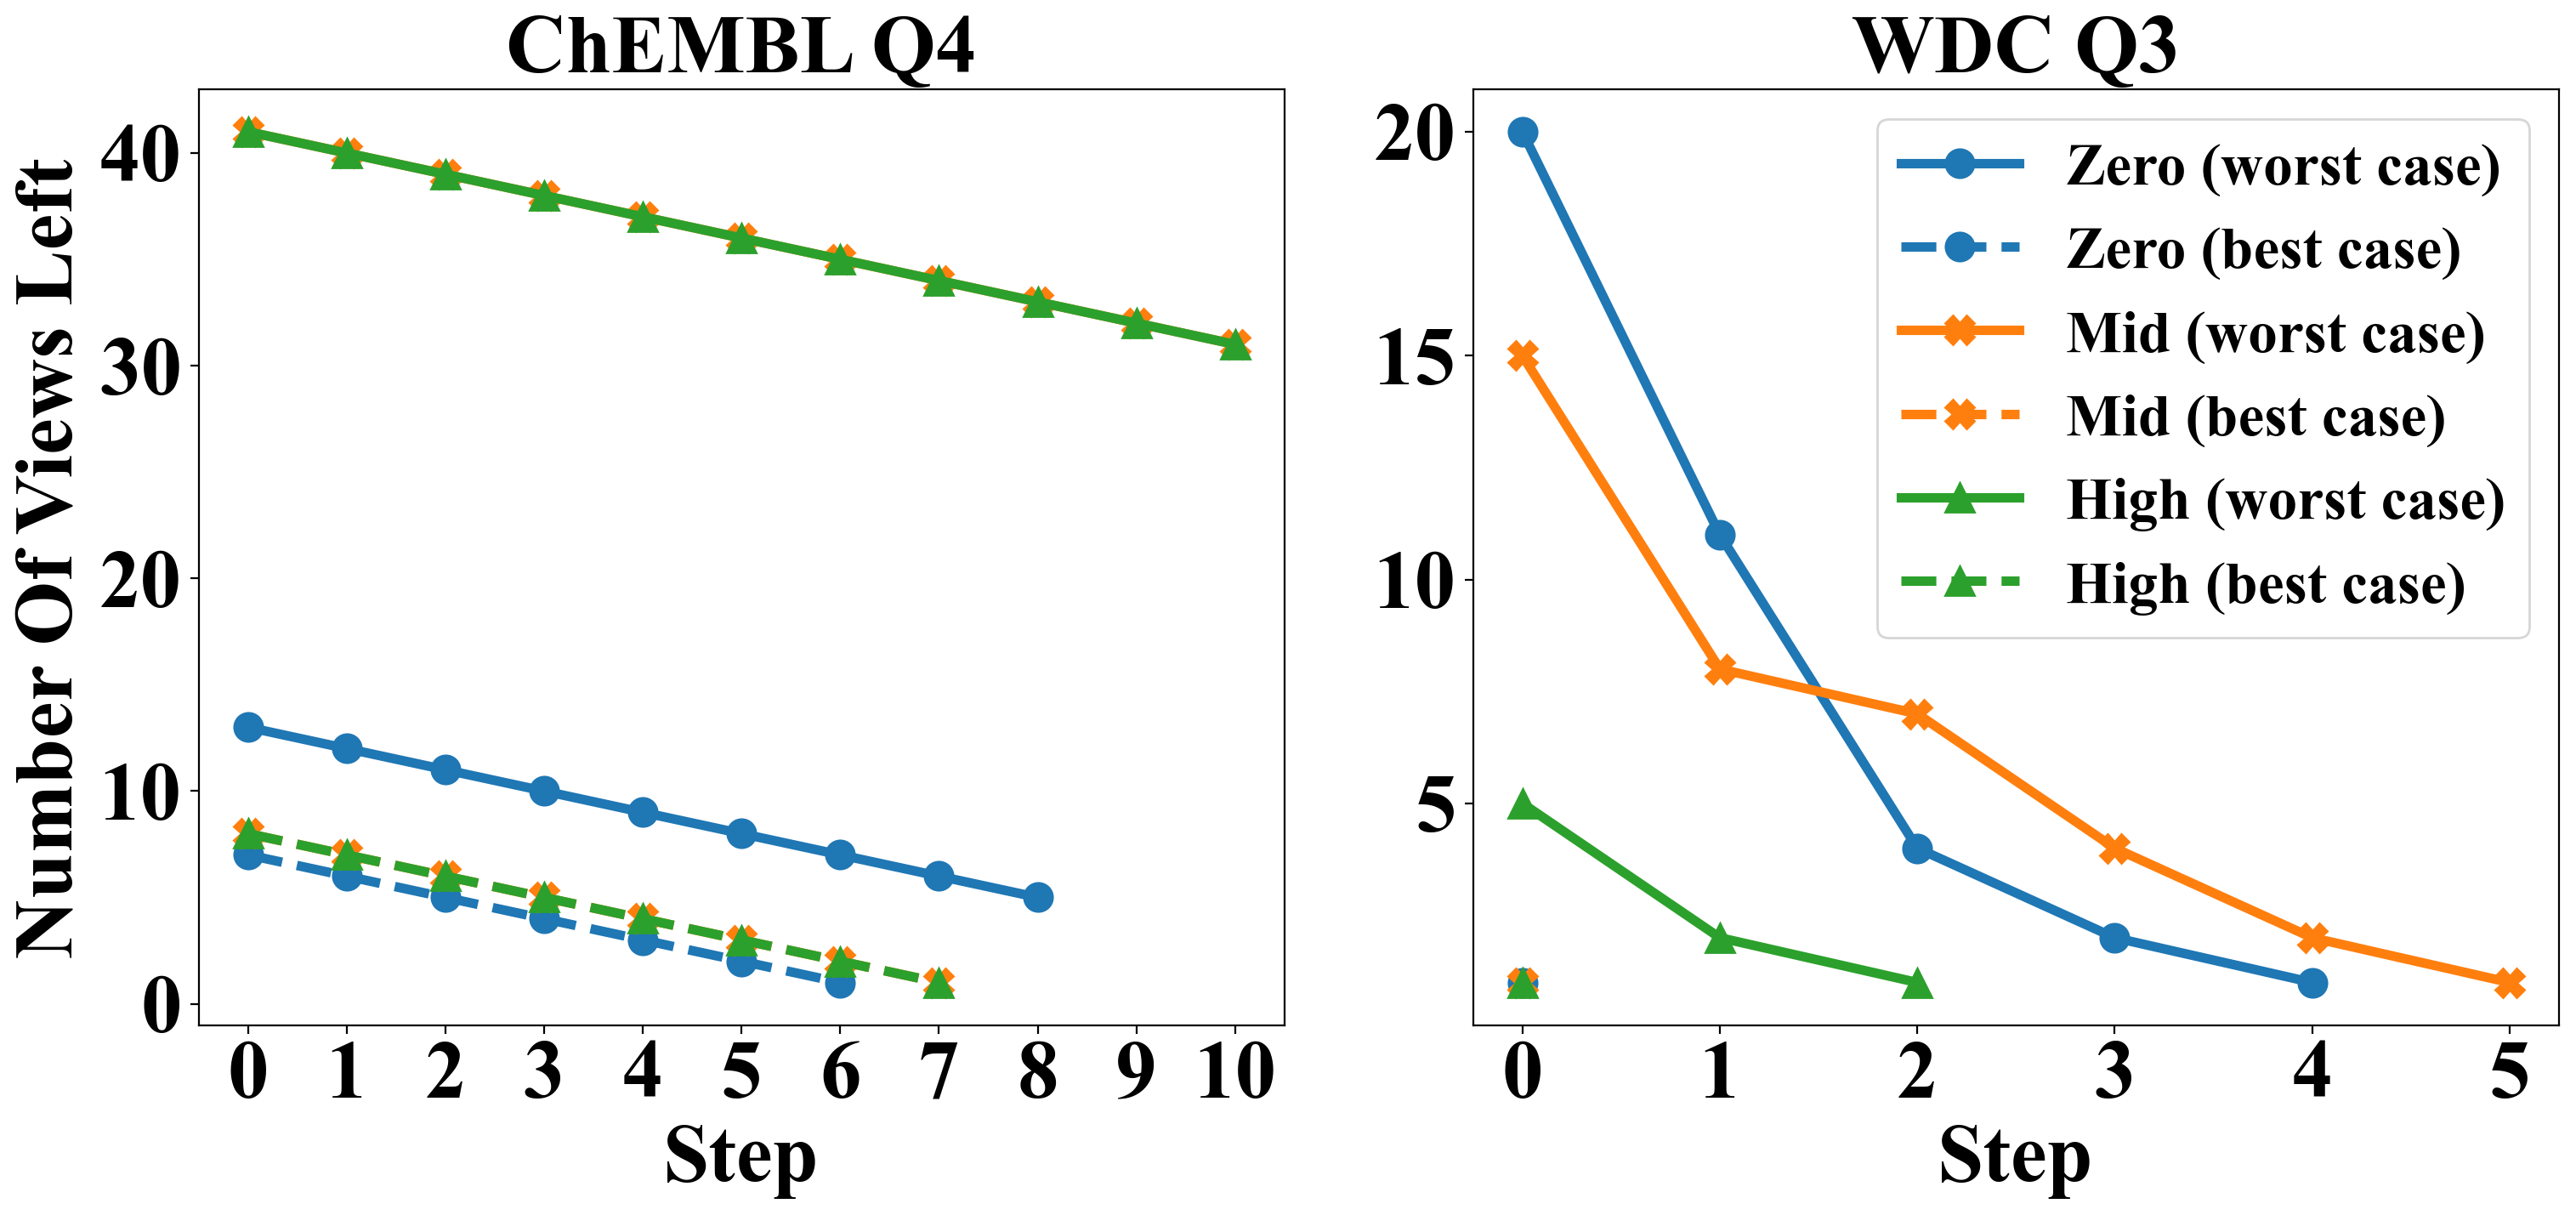

In [17]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "35"
plt.rcParams["font.weight"] = "bold"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'][:3]
markers = ['o', 'X', '^']

worst_cases = [[[13, 12, 11, 10, 9, 8, 7, 6, 5], [41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31], [41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31]],
               [[20, 11, 4, 2, 1], [15, 8, 7, 4, 2, 1], [5, 2, 1]]]
best_cases = [[[7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5, 4, 3, 2, 1], [8, 7, 6, 5, 4, 3, 2, 1]],
              [[1], [1], [1]]]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for i in range(2):
    ax[i].yaxis.get_major_locator().set_params(integer=True)
    max_len = max([len(l) for l in worst_cases[i]])
    x_axis = [j for j in range(max_len)]

    for j, noise in enumerate(["Zero", "Mid", "High"]):

        worst_case = worst_cases[i][j]
        best_case = best_cases[i][j]

        worst_case += [np.nan] * (len(x_axis) - len(worst_case))
        best_case += [np.nan] * (len(x_axis) - len(best_case))

        if i == 1:
            ax[i].plot(x_axis, worst_case, color=colors[j], linewidth=4, linestyle='-', markersize=12, marker=markers[j], label=noise + " (worst case)")
            ax[i].plot(x_axis, best_case, color=colors[j], linewidth=4, linestyle='--', markersize=12, marker=markers[j], label=noise + " (best case)")
        else:
            ax[i].plot(x_axis, worst_case, color=colors[j], linewidth=4, linestyle='-', markersize=12, marker=markers[j])
            ax[i].plot(x_axis, best_case, color=colors[j], linewidth=4, linestyle='--', markersize=12, marker=markers[j])

    # fig.subplots_adjust(bottom=0.3, wspace=0.33)
    ax[i].set_xticks(x_axis)
    if i == 0:
        ax[i].set_title("ChEMBL Q4", fontweight='bold', fontsize='35')
    else:
        ax[i].set_title("WDC Q3", fontweight='bold', fontsize='35')

ax[1].legend(fontsize='25')
for a in ax.flat:
    a.set_xlabel('Step', fontweight='bold', fontsize='35')
    # a.set_ylabel('Number Of Views Left', fontweight='bold', fontsize='35')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()
# y_ticks = [i for i in range(min(best_case), max(worst_case) + 1)]
# plt.yticks(y_ticks)
# plt.title("Number of views left at each step after pruning using contradictory signals")
ax[0].set_ylabel('Number Of Views Left', fontweight='bold', fontsize='35')
plt.tight_layout()
plot_fn = "./test_dir/num_views_left.pdf"
plt.savefig(plot_fn)
plt.show()
plt.close()